In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
contact_center_df = pd.read_parquet('datasets/Contact Center.parquet')
cc_txns_df = pd.read_parquet('datasets/Credit Card Txns.parquet')
cust_info_df = pd.read_parquet('datasets/Customer Info.parquet')
cust_status_df = pd.read_parquet('datasets/Customer Status.parquet')
db_txns_df = pd.read_parquet('datasets/Debit Card Txns.parquet')
instapay_txns_in_df = pd.read_parquet('datasets/Instapay (Incoming) Txns.parquet')
instapay_txns_out_df = pd.read_parquet('datasets/Instapay (Outgoing) Txns.parquet')
customer_funds_df = pd.read_parquet('datasets/Monthly Funds.parquet')
online_bank_txns_df = pd.read_parquet('datasets/Online Banking Txns.parquet')
psycho_df = pd.read_parquet('datasets/Psychographic Info.parquet')

In [ ]:
psycho_df['CUST_NUM'].nunique()

321205

In [ ]:
psycho_df.columns

Index(['CUST_NUM', 'FOOD_LOVER', 'FASHIONISTA', 'SPORTS_ENTHUSIAST',
       'BOOK_LOVER', 'TRAVELLER', 'MOVIE_LOVER', 'COFFEE_LOVER', 'TECH_GEEK',
       'GAMER', 'MUSIC_LOVER', 'PROVINCE'],
      dtype='object')

In [ ]:
import pandas as pd

columns_to_check = psycho_df.columns[1:-1]

mask = (psycho_df[columns_to_check] == 'NO_DATA').all(axis=1)

psycho_df_cleaned = psycho_df[~mask]


In [ ]:
columns_to_count = psycho_df.columns[1:-1]

value_counts_dict = {}

for column in columns_to_count:
    value_counts_dict[column] = psycho_df[column].value_counts()

for column, counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'FOOD_LOVER':
FOOD_LOVER
NO_DATA    263529
B_TIER      34728
A_TIER      13267
S_TIER      11288
Name: count, dtype: int64


Value counts for column 'FASHIONISTA':
FASHIONISTA
NO_DATA    297568
B_TIER      14870
A_TIER       5569
S_TIER       4805
Name: count, dtype: int64


Value counts for column 'SPORTS_ENTHUSIAST':
SPORTS_ENTHUSIAST
NO_DATA    310407
B_TIER       7492
A_TIER       2623
S_TIER       2290
Name: count, dtype: int64


Value counts for column 'BOOK_LOVER':
BOOK_LOVER
NO_DATA    321761
B_TIER        603
A_TIER        382
S_TIER         66
Name: count, dtype: int64


Value counts for column 'TRAVELLER':
TRAVELLER
NO_DATA    298525
B_TIER      14511
A_TIER       5633
S_TIER       4143
Name: count, dtype: int64


Value counts for column 'MOVIE_LOVER':
MOVIE_LOVER
NO_DATA    309559
B_TIER       7513
A_TIER       3861
S_TIER       1879
Name: count, dtype: int64


Value counts for column 'COFFEE_LOVER':
COFFEE_LOVER
NO_DATA    309795
B_TIER       7949
A

In [ ]:
import pandas as pd

psycho_gen_df = pd.DataFrame()

psycho_gen_df['CUST_NUM'] = psycho_df['CUST_NUM']

psycho_gen_df['FOOD_LOVER'] = (psycho_df['FOOD_LOVER'].isin(['A_TIER', 'S_TIER'])).astype(int)
psycho_gen_df['FASHIONISTA'] = (psycho_df['FASHIONISTA'].isin(['A_TIER', 'S_TIER'])).astype(int)
psycho_gen_df['ATHLEISURE'] = ((psycho_df['SPORTS_ENTHUSIAST'].isin(['A_TIER', 'S_TIER'])) |
                               (psycho_df['TRAVELLER'].isin(['A_TIER', 'S_TIER']))).astype(int)
psycho_gen_df['LIFESTYLE'] = ((psycho_df['BOOK_LOVER'].isin(['A_TIER', 'S_TIER'])) |
                              (psycho_df['MOVIE_LOVER'].isin(['A_TIER', 'S_TIER'])) |
                              (psycho_df['MUSIC_LOVER'].isin(['A_TIER', 'S_TIER'])) |
                              (psycho_df['COFFEE_LOVER'].isin(['A_TIER', 'S_TIER']))).astype(int)
psycho_gen_df['TECHNOLOGY'] = ((psycho_df['TECH_GEEK'].isin(['A_TIER', 'S_TIER'])) |
                                (psycho_df['GAMER'].isin(['A_TIER', 'S_TIER']))).astype(int)

columns_to_check = psycho_gen_df.columns[1:]

mask = (psycho_gen_df[columns_to_check] == 0).all(axis=1)

psycho_gen_df = psycho_gen_df[~mask]

psycho_gen_df = psycho_gen_df.drop_duplicates(subset=['CUST_NUM'])


In [ ]:
columns_to_count = psycho_gen_df.columns[1:]

value_counts_dict = {}

for column in columns_to_count:
    value_counts_dict[column] = psycho_gen_df[column].value_counts()

for column, counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'FOOD_LOVER':
FOOD_LOVER
1    24447
0    11316
Name: count, dtype: int64


Value counts for column 'FASHIONISTA':
FASHIONISTA
0    25442
1    10321
Name: count, dtype: int64


Value counts for column 'ATHLEISURE':
ATHLEISURE
0    23168
1    12595
Name: count, dtype: int64


Value counts for column 'LIFESTYLE':
LIFESTYLE
0    23160
1    12603
Name: count, dtype: int64


Value counts for column 'TECHNOLOGY':
TECHNOLOGY
0    25176
1    10587
Name: count, dtype: int64




In [ ]:
columns_to_check = psycho_gen_df.columns[1:]

count_of_ones = psycho_gen_df[columns_to_check].sum(axis=1)

rows_with_multiple_ones = (count_of_ones > 1).sum()

print(f"Number of rows with multiple columns having value 1: {rows_with_multiple_ones}")


Number of rows with multiple columns having value 1: 18568


# MERGING CREDIT CARD

In [ ]:
cc_txns_cust_nums = set(cc_txns_df['CUST_NUM'])

psycho_cc = psycho_gen_df[psycho_gen_df['CUST_NUM'].isin(cc_txns_cust_nums)]

psycho_cc

,CUST_NUM,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY
2,711.844084,0,0,1,1,0
3,874.197918,0,0,1,0,0
6,1027.034566,0,0,0,0,1
9,1117.864929,0,1,0,0,0
11,1193.575301,1,1,1,1,0
...,...,...,...,...,...,...
322542,14140.499284,0,1,1,1,1
322549,14140.686829,1,0,0,0,0
322557,14140.849479,1,1,1,0,0
322570,14141.135810,1,1,1,1,0


In [ ]:
columns_to_count = psycho_cc.columns[1:]

value_counts_dict = {}

for column in columns_to_count:
    value_counts_dict[column] = psycho_cc[column].value_counts()

for column, counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'FOOD_LOVER':
FOOD_LOVER
1    17785
0     7705
Name: count, dtype: int64


Value counts for column 'FASHIONISTA':
FASHIONISTA
0    15698
1     9792
Name: count, dtype: int64


Value counts for column 'ATHLEISURE':
ATHLEISURE
0    14706
1    10784
Name: count, dtype: int64


Value counts for column 'LIFESTYLE':
LIFESTYLE
0    15628
1     9862
Name: count, dtype: int64


Value counts for column 'TECHNOLOGY':
TECHNOLOGY
0    16946
1     8544
Name: count, dtype: int64




In [ ]:
import pandas as pd

# Convert DATE to datetime
cc_txns_df['DATE'] = pd.to_datetime(cc_txns_df['DATE'])

# Define reference date
reference_date = pd.Timestamp('2024-04-01')

# Compute RFM metrics
rfm_df = cc_txns_df.groupby('CUST_NUM').agg({
    'DATE': lambda x: (reference_date - x.max()).days,  # Recency in days
    'AMOUNT': ['count', 'sum']  # Frequency and Monetary
}).reset_index()

# Flatten multi-level columns and rename them
rfm_df.columns = ['CUST_NUM', 'Recency', 'Frequency', 'Monetary']

# Rank Recency so that lower values have higher ranks
rfm_df['RECENCY_RANK'] = pd.qcut(rfm_df['Recency'], 4, labels=False, duplicates='drop') + 1
rfm_df['RECENCY_RANK'] = 5 - rfm_df['RECENCY_RANK']  # Invert the rank to ensure lower Recency has a higher rank

# Rank Frequency and Monetary
rfm_df['FREQUENCY_RANK'] = pd.qcut(rfm_df['Frequency'], 4, labels=False, duplicates='drop') + 1
rfm_df['MONETARY_RANK'] = pd.qcut(rfm_df['Monetary'], 4, labels=False, duplicates='drop') + 1

# Convert ranks to categorical types
rfm_df['RECENCY_RANK'] = rfm_df['RECENCY_RANK'].astype('category')
rfm_df['FREQUENCY_RANK'] = rfm_df['FREQUENCY_RANK'].astype('category')
rfm_df['MONETARY_RANK'] = rfm_df['MONETARY_RANK'].astype('category')

# Select relevant columns
cc_rfm = rfm_df[['CUST_NUM', 'RECENCY_RANK', 'FREQUENCY_RANK', 'MONETARY_RANK']]


In [ ]:
rfm_df

,CUST_NUM,Recency,Frequency,Monetary,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK
0,139.721151,2,41,157948.021517,4,4,4
1,142.625383,13,27,23276.127326,2,3,2
2,171.002924,2,20,27686.502369,4,3,2
3,206.014563,2,2,33385.440440,4,1,2
4,220.099977,3,15,10749.183223,3,3,1
...,...,...,...,...,...,...,...
39611,14140.849479,8,45,38304.484981,2,4,3
39612,14141.135810,1,127,120527.475442,4,4,4
39613,14141.399577,7,21,15568.257307,3,3,2
39614,14141.406649,20,6,2847.150817,1,2,1


In [ ]:
cc_rfm

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK
0,139.721151,4,4,4
1,142.625383,2,3,2
2,171.002924,4,3,2
3,206.014563,4,1,2
4,220.099977,3,3,1
...,...,...,...,...
39611,14140.849479,2,4,3
39612,14141.135810,4,4,4
39613,14141.399577,3,3,2
39614,14141.406649,1,2,1


In [ ]:
psycho_cust_nums = set(psycho_gen_df['CUST_NUM'])
cc_rfm_cust_nums = set(cc_rfm['CUST_NUM'])

common_cust_nums = psycho_cust_nums.intersection(cc_rfm_cust_nums)

num_common = len(common_cust_nums)

print(f"Number of CUST_NUM values in psycho_gen_df that are also in cc_rfm: {num_common}")

Number of CUST_NUM values in psycho_gen_df that are also in cc_rfm: 25490


In [ ]:
psycho_cc_rfm = pd.merge(cc_rfm, psycho_gen_df, on='CUST_NUM', how='inner')

In [ ]:
psycho_cc_rfm

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY
0,142.625383,2,3,2,0,0,1,0,0
1,206.014563,4,1,2,0,0,1,1,0
2,220.099977,3,3,1,0,0,0,1,0
3,224.187422,1,1,1,0,0,1,0,0
4,248.282098,2,3,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
25485,14140.499284,4,4,4,0,1,1,1,1
25486,14140.686829,4,4,3,1,0,0,0,0
25487,14140.849479,2,4,3,1,1,1,0,0
25488,14141.135810,4,4,4,1,1,1,1,0


# MERGING CUSTOMER INFO

In [ ]:
import pandas as pd

psycho_cc_rfm_cust_nums = set(psycho_cc_rfm['CUST_NUM'])
cust_info_cust_nums = set(cust_info_df['CUST_NUM'])

common_cust_nums = psycho_cc_rfm_cust_nums.intersection(cust_info_cust_nums)

num_common = len(common_cust_nums)

print(f"Number of CUST_NUM values in psycho_cc_rfm that are also in cust_info_df: {num_common}")

Number of CUST_NUM values in psycho_cc_rfm that are also in cust_info_df: 25490


In [ ]:
info_df = cust_info_df.drop_duplicates(subset=['CUST_NUM'])

all_test = set(psycho_cc_rfm['CUST_NUM'])

info = info_df[info_df['CUST_NUM'].isin(all_test)]

In [ ]:
columns_to_count = info.columns[1:]

value_counts_dict = {}

for column in columns_to_count:
    value_counts_dict[column] = info[column].value_counts()

for column, counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'PROVINCE':
PROVINCE
NATIONAL CAPITAL REGION           13978
CEBU                               1261
LAGUNA                             1224
CAVITE                             1201
PAMPANGA                            703
RIZAL                               675
BULACAN                             624
DAVAO DEL SUR                       616
BATANGAS                            564
MISAMIS ORIENTAL                    416
ILOILO                              408
NEGROS OCCIDENTAL                   377
BENGUET                             291
PANGASINAN                          191
SOUTH COTABATO                      176
ZAMBOANGA DEL SUR                   171
ZAMBALES                            166
QUEZON                              139
NEGROS ORIENTAL                     135
NUEVA ECIJA                         129
LEYTE                               127
BATAAN                              127
BOHOL                               124
LA UNION                           

In [ ]:
info.AGE.max()

94.0

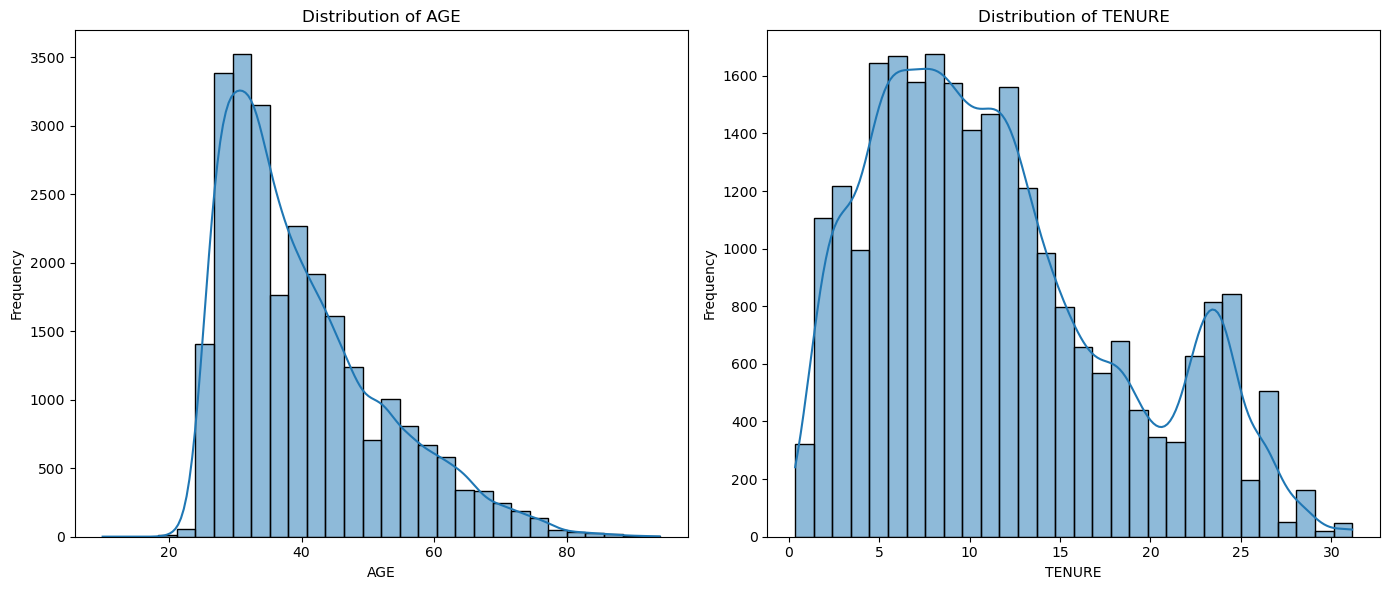

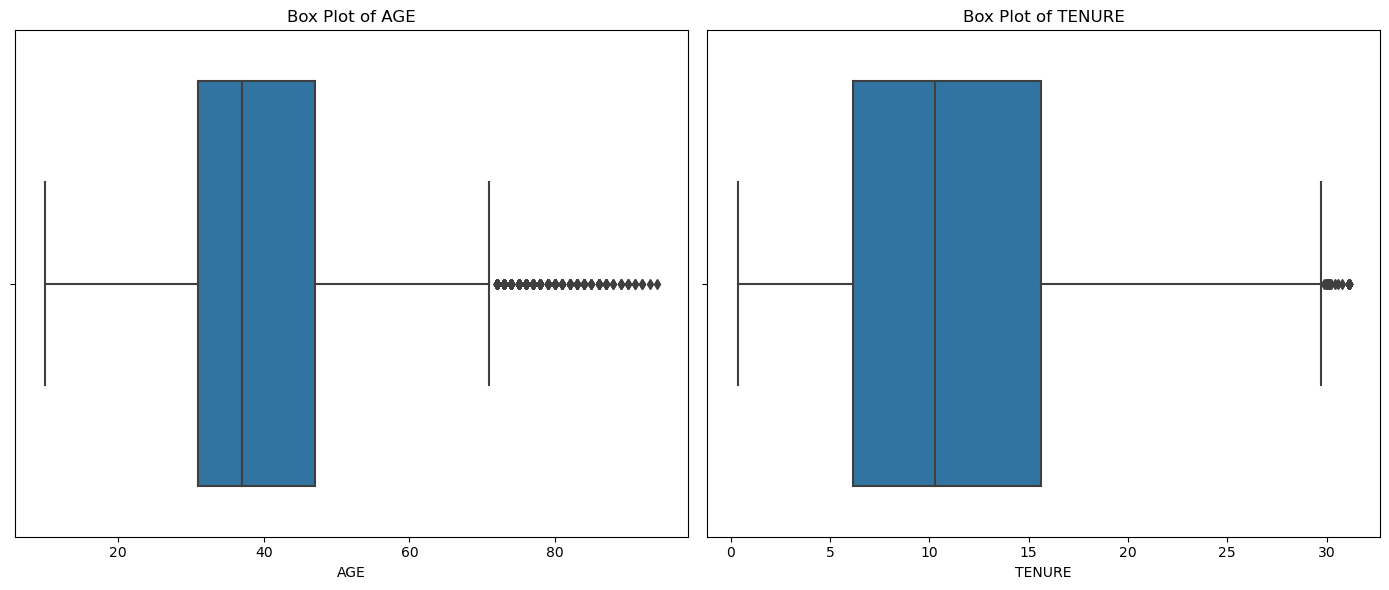

In [ ]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(info['AGE'], bins=30, kde=True)
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(info['TENURE'], bins=30, kde=True)
plt.title('Distribution of TENURE')
plt.xlabel('TENURE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=info['AGE'])
plt.title('Box Plot of AGE')

plt.subplot(1, 2, 2)
sns.boxplot(x=info['TENURE'])
plt.title('Box Plot of TENURE')

plt.tight_layout()
plt.show()


In [ ]:
# Replace 'MLE' with 'MALE' in the GENDER column
info['GENDER'] = info['GENDER'].replace('MLE', 'MALE')

# Adjust the MARITAL STATUS column
info['MARITAL_STATUS'] = info['MARITAL_STATUS'].apply(lambda x: x if x in ['SINGLE', 'MARRIED'] else 'OTHERS')

# Define the bins and labels for AGE
age_bins = [0, 30, 39, 49, 59, float('inf')]
age_labels = ['0-30', '31-39','40-49', '50-59', '60+']

# Define the bins and labels for TENURE
tenure_bins = [0, 6, 12, float('inf')]
tenure_labels = ['0-6', '7-12', '13+']

# Create the categorical columns
info['AGE'] = pd.cut(info['AGE'], bins=age_bins, labels=age_labels, right=False)
info['TENURE'] = pd.cut(info['TENURE'], bins=tenure_bins, labels=tenure_labels, right=False)

# Ensure the DataFrame contains only the specified columns
info = info[['CUST_NUM', 'MARITAL_STATUS', 'SUBSEGMENT', 'GENDER', 'AGE', 'TENURE']]

In [ ]:
info.dtypes

CUST_NUM           float64
MARITAL_STATUS      object
SUBSEGMENT          object
GENDER              object
AGE               category
TENURE            category
dtype: object

In [ ]:
info

,CUST_NUM,MARITAL_STATUS,SUBSEGMENT,GENDER,AGE,TENURE
443,3205.814093,SINGLE,Lower Tier,FEMALE,0-30,0-6
694,4230.004965,SINGLE,Upper-Middle Tier,MALE,0-30,7-12
778,4481.937304,SINGLE,Upper-Middle Tier,FEMALE,0-30,7-12
825,4663.503404,SINGLE,Lower Tier,MALE,0-30,0-6
848,4734.959768,SINGLE,Lower Tier,FEMALE,0-30,0-6
...,...,...,...,...,...,...
305053,10227.041703,MARRIED,Middle Tier,FEMALE,40-49,7-12
305071,10923.852800,MARRIED,Lower Tier,MALE,40-49,13+
305083,11392.237006,OTHERS,Upper-Middle Tier,FEMALE,31-39,0-6
305127,12926.030481,OTHERS,Upper-Middle Tier,FEMALE,40-49,0-6


In [ ]:
columns_to_count = info.columns[1:]

value_counts_dict = {}

for column in columns_to_count:
    value_counts_dict[column] = info[column].value_counts()

for column, counts in value_counts_dict.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'MARITAL_STATUS':
MARITAL_STATUS
SINGLE     13877
MARRIED     9536
OTHERS      2077
Name: count, dtype: int64


Value counts for column 'SUBSEGMENT':
SUBSEGMENT
Upper-Middle Tier    10466
Middle Tier           8928
Lower Tier            6023
Top Tier                73
Name: count, dtype: int64


Value counts for column 'GENDER':
GENDER
FEMALE    14763
MALE      10242
OTHERS      485
Name: count, dtype: int64


Value counts for column 'AGE':
AGE
31-39    9218
40-49    5892
0-30     4856
50-59    3108
60+      2416
Name: count, dtype: int64


Value counts for column 'TENURE':
TENURE
13+     10182
7-12     9160
0-6      6148
Name: count, dtype: int64




In [ ]:
merged = pd.merge(psycho_cc_rfm, info, on='CUST_NUM', how='inner')

new_order = [
    'CUST_NUM', 'RECENCY_RANK', 'FREQUENCY_RANK', 'MONETARY_RANK',
    'MARITAL_STATUS', 'SUBSEGMENT', 'GENDER', 'AGE', 'TENURE',
    'FOOD_LOVER', 'FASHIONISTA', 'ATHLEISURE', 'LIFESTYLE', 'TECHNOLOGY'
]

merged = merged[new_order]

In [ ]:
merged.dtypes

CUST_NUM           float64
RECENCY_RANK      category
FREQUENCY_RANK    category
MONETARY_RANK     category
MARITAL_STATUS      object
SUBSEGMENT          object
GENDER              object
AGE               category
TENURE            category
FOOD_LOVER           int32
FASHIONISTA          int32
ATHLEISURE           int32
LIFESTYLE            int32
TECHNOLOGY           int32
dtype: object

In [ ]:
merged

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK,MARITAL_STATUS,SUBSEGMENT,GENDER,AGE,TENURE,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY
0,142.625383,2,3,2,SINGLE,Upper-Middle Tier,MALE,31-39,7-12,0,0,1,0,0
1,206.014563,4,1,2,OTHERS,Upper-Middle Tier,FEMALE,60+,13+,0,0,1,1,0
2,220.099977,3,3,1,SINGLE,Lower Tier,FEMALE,0-30,0-6,0,0,0,1,0
3,224.187422,1,1,1,MARRIED,Upper-Middle Tier,FEMALE,60+,13+,0,0,1,0,0
4,248.282098,2,3,2,SINGLE,Lower Tier,MALE,40-49,0-6,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,14140.499284,4,4,4,SINGLE,Upper-Middle Tier,FEMALE,40-49,13+,0,1,1,1,1
25486,14140.686829,4,4,3,SINGLE,Middle Tier,FEMALE,0-30,0-6,1,0,0,0,0
25487,14140.849479,2,4,3,MARRIED,Middle Tier,FEMALE,40-49,0-6,1,1,1,0,0
25488,14141.135810,4,4,4,SINGLE,Middle Tier,FEMALE,0-30,7-12,1,1,1,1,0


# KMODES

# ETO NA TALGA

In [ ]:
clust = merged.copy()

In [ ]:
clust.dtypes

CUST_NUM           float64
RECENCY_RANK      category
FREQUENCY_RANK    category
MONETARY_RANK     category
MARITAL_STATUS      object
SUBSEGMENT          object
GENDER              object
AGE               category
TENURE            category
FOOD_LOVER           int32
FASHIONISTA          int32
ATHLEISURE           int32
LIFESTYLE            int32
TECHNOLOGY           int32
dtype: object

In [ ]:
# # Define your categorical columns for K-Modes clustering
# features_for_clustering = [
#     'RECENCY_RANK', 'FREQUENCY_RANK', 'MONETARY_RANK',
#     'FOOD_LOVER', 'FASHIONISTA', 'ATHLEISURE', 'LIFESTYLE', 'TECHNOLOGY'
# ]

# # Ensure all relevant columns are categorical
# for col in features_for_clustering:
#     if not pd.api.types.is_categorical_dtype(clust[col]):
#         clust[col] = clust[col].astype('category')

# # Convert categorical columns to numeric codes for K-Modes
# for col in features_for_clustering:
#     clust[col] = clust[col].cat.codes


In [ ]:
# # Define your categorical columns for K-Modes clustering
# features_for_clustering = [
#     'FOOD_LOVER', 'FASHIONISTA', 'ATHLEISURE', 'LIFESTYLE', 'TECHNOLOGY'
# ]

# # Ensure all relevant columns are categorical
# for col in features_for_clustering:
#     if not pd.api.types.is_categorical_dtype(clust[col]):
#         clust[col] = clust[col].astype('category')

# # Convert categorical columns to numeric codes for K-Modes
# for col in features_for_clustering:
#     clust[col] = clust[col].cat.codes


In [ ]:
# # Define your categorical columns for K-Modes clustering
# features_for_clustering = [
#     'GENDER', 'AGE', 'TENURE', 'MARITAL_STATUS', 'SUBSEGMENT'
# ]

# # Ensure all relevant columns are categorical
# for col in features_for_clustering:
#     if not pd.api.types.is_categorical_dtype(clust[col]):
#         clust[col] = clust[col].astype('category')

# # Convert categorical columns to numeric codes for K-Modes
# for col in features_for_clustering:
#     clust[col] = clust[col].cat.codes


In [ ]:
# # Define your categorical columns for K-Modes clustering
# features_for_clustering = [
#     'RECENCY_RANK', 'FREQUENCY_RANK', 'MONETARY_RANK'
# ]

# # Ensure all relevant columns are categorical
# for col in features_for_clustering:
#     if not pd.api.types.is_categorical_dtype(clust[col]):
#         clust[col] = clust[col].astype('category')

# # Convert categorical columns to numeric codes for K-Modes
# for col in features_for_clustering:
#     clust[col] = clust[col].cat.codes


In [ ]:
# Define your categorical columns for K-Modes clustering
features_for_clustering = [
    'FOOD_LOVER', 'FASHIONISTA', 'ATHLEISURE', 'LIFESTYLE', 'TECHNOLOGY',
    'GENDER', 'AGE', 'TENURE', 'MARITAL_STATUS', 'SUBSEGMENT'
]
# Save the category mappings before converting to codes
code_to_category = {}
for col in features_for_clustering:
    clust[col] = clust[col].astype('category')
    code_to_category[col] = dict(enumerate(clust[col].cat.categories))

# Convert categorical columns to numeric codes for K-Modes
for col in features_for_clustering:
    clust[col] = clust[col].cat.codes


In [ ]:
clust

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK,MARITAL_STATUS,SUBSEGMENT,GENDER,AGE,TENURE,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY
0,142.625383,2,3,2,2,3,1,1,1,0,0,1,0,0
1,206.014563,4,1,2,1,3,0,4,2,0,0,1,1,0
2,220.099977,3,3,1,2,0,0,0,0,0,0,0,1,0
3,224.187422,1,1,1,0,3,0,4,2,0,0,1,0,0
4,248.282098,2,3,2,2,0,1,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,14140.499284,4,4,4,2,3,0,2,2,0,1,1,1,1
25486,14140.686829,4,4,3,2,1,0,0,0,1,0,0,0,0
25487,14140.849479,2,4,3,0,1,0,2,0,1,1,1,0,0
25488,14141.135810,4,4,4,2,1,0,0,1,1,1,1,1,0


In [ ]:
clust.dtypes

CUST_NUM           float64
RECENCY_RANK      category
FREQUENCY_RANK    category
MONETARY_RANK     category
MARITAL_STATUS        int8
SUBSEGMENT            int8
GENDER                int8
AGE                   int8
TENURE                int8
FOOD_LOVER            int8
FASHIONISTA           int8
ATHLEISURE            int8
LIFESTYLE             int8
TECHNOLOGY            int8
dtype: object

In [ ]:
clust[features_for_clustering]

,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY,GENDER,AGE,TENURE,MARITAL_STATUS,SUBSEGMENT
0,0,0,1,0,0,1,1,1,2,3
1,0,0,1,1,0,0,4,2,1,3
2,0,0,0,1,0,0,0,0,2,0
3,0,0,1,0,0,0,4,2,0,3
4,1,0,0,0,0,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...
25485,0,1,1,1,1,0,2,2,2,3
25486,1,0,0,0,0,0,0,0,2,1
25487,1,1,1,0,0,0,2,0,0,1
25488,1,1,1,1,0,0,0,1,2,1


In [ ]:
# Perform K-Modes clustering
optimal_clusters = 6
kmodes = KModes(n_clusters=optimal_clusters, init='Huang', n_init=5, verbose=1, random_state = 42)
clusters = kmodes.fit_predict(clust[features_for_clustering])
clust['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4460, cost: 84313.0
Run 1, iteration: 2/100, moves: 187, cost: 84313.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4259, cost: 80581.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6181, cost: 77651.0
Run 3, iteration: 2/100, moves: 595, cost: 77651.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8260, cost: 82280.0
Run 4, iteration: 2/100, moves: 1625, cost: 82280.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9014, cost: 77735.0
Run 5, iteration: 2/100, moves: 2875, cost: 77735.0
Best run was number 3


In [ ]:
clust['Cluster'].value_counts()

Cluster
1    8740
0    5732
2    3323
5    3314
4    2944
3    1437
Name: count, dtype: int64

In [ ]:
# # Define the range for number of clusters
# K = range(1, 11)
# cost = []

# # Compute K-Modes clustering and cost for different K
# for num_clusters in K:
#     kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
#     clusters = kmodes.fit_predict(clust[features_for_clustering])
#     cost.append(kmodes.cost_)



In [ ]:
# # Plot the elbow curve
# plt.plot(K, cost, 'bx-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method for Optimal Number of Clusters')
# plt.show()

In [ ]:
# # Subset the DataFrame to only include the categorical columns
# clust_subset = clust[features_for_clustering]

# # List to store the metrics
# metrics = {
#     'Number of Clusters': [],
#     'Calinski-Harabasz Index': [],
#     'Davies-Bouldin Index': [],
#     'Silhouette Score': [],
#     'Inertia (Cost)': []
# }

# # Evaluate clustering for K=5, 6, 7
# for num_clusters in [5, 6, 7]:
#     kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
#     clusters = kmodes.fit_predict(clust_subset)

#     # Add the cluster labels to the subset DataFrame
#     clust_subset['Cluster'] = clusters

#     # Calculate metrics
#     # Note: Metrics like Calinski-Harabasz, Davies-Bouldin, and Silhouette are not always defined for categorical data
#     try:
#         ch_score = calinski_harabasz_score(clust_subset[features_for_clustering], clusters)
#     except ValueError:
#         ch_score = float('nan')  # or another suitable value

#     try:
#         db_score = davies_bouldin_score(clust_subset[features_for_clustering], clusters)
#     except ValueError:
#         db_score = float('nan')

#     try:
#         sil_score = silhouette_score(clust_subset[features_for_clustering], clusters)
#     except ValueError:
#         sil_score = float('nan')

#     # Get Inertia (Cost) from K-Modes
#     inertia = kmodes.cost_

#     # Store the results in the metrics dictionary
#     metrics['Number of Clusters'].append(num_clusters)
#     metrics['Calinski-Harabasz Index'].append(ch_score)
#     metrics['Davies-Bouldin Index'].append(db_score)
#     metrics['Silhouette Score'].append(sil_score)
#     metrics['Inertia (Cost)'].append(inertia)

In [ ]:
# metrics_df = pd.DataFrame(metrics)
# display(metrics_df)

In [ ]:
def plot_top_features(df, cluster_number):
    # Filter the DataFrame for the given cluster
    cluster_df = df[df['Cluster'] == cluster_number]

    # Reconstruct the original categorical values from the numeric codes
    for col in features_for_clustering:
        cluster_df[col] = cluster_df[col].map(code_to_category[col])

    # Set up the figure and axes for plotting
    num_first_row_features = 5  # Number of features for the first row
    num_second_row_features = 4  # Number of features for the second row
    num_cols = max(num_first_row_features, num_second_row_features)
    fig, axs = plt.subplots(2, num_cols, figsize=(20, 10))
    fig.suptitle(f'Cluster {cluster_number} - Top Features', fontsize=16)

    # Flatten the axs array for easy iteration
    axs = axs.flatten()

    # Define a function to plot top 3 features
    def plot_top_3_feature(feature, ax):
        top_3 = cluster_df[feature].value_counts().head(3)
        top_3.plot(kind='bar', ax=ax, title=feature, ylabel='Count')

        # Highlight the top bar with color and make others light grey
        max_count = top_3.max()
        for bar in ax.patches:
            if bar.get_height() == max_count:
                bar.set_color('#e94343')  # Highlight top bar with specific color
            else:
                bar.set_alpha(0.3)  # Make other bars transparent

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Tilt x labels

    # Define a function to plot top 3 binary features with most 1s
    def plot_top_3_binary_features(binary_features, ax):
        top_3_binary = {feature: cluster_df[feature].sum() for feature in binary_features}
        top_3_binary = pd.Series(top_3_binary).sort_values(ascending=False).head(3)
        top_3_binary.plot(kind='bar', ax=ax, title='PSYCHOGRAPHIC', ylabel='Count')

        # Color all bars in binary features plot
        for bar in ax.patches:
            bar.set_color('#e94343')  # Color all bars in binary features plot

        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Tilt x labels

    # Plot top 3 for categorical features in the first row
    first_row_features = ['MARITAL_STATUS', 'SUBSEGMENT', 'GENDER', 'AGE', 'TENURE']
    for i, feature in enumerate(first_row_features):
        plot_top_3_feature(feature, axs[i])
        axs[i].set_xlabel('')  # Remove x labels

    # Plot top 3 for binary features in the second row
    binary_features = ['FOOD_LOVER', 'FASHIONISTA', 'ATHLEISURE', 'LIFESTYLE', 'TECHNOLOGY']
    plot_top_3_binary_features(binary_features, axs[num_first_row_features])
    axs[num_first_row_features].set_xlabel('')  # Remove x labels

    # Plot top 3 for remaining categorical features in the second row
    second_row_features = ['RECENCY_RANK', 'FREQUENCY_RANK', 'MONETARY_RANK']
    for i, feature in enumerate(second_row_features):
        plot_top_3_feature(feature, axs[num_first_row_features + 1 + i])
        axs[num_first_row_features + 1 + i].set_xlabel('')  # Remove x labels

    # Remove unused subplots
    for j in range(num_first_row_features + num_second_row_features, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# def plot_top_features(df, cluster_number):
#     # Filter the DataFrame for the given cluster
#     cluster_df = df[df['Cluster'] == cluster_number]

#     # Reconstruct the original categorical values from the numeric codes
#     for col in features_for_clustering:
#         cluster_df[col] = cluster_df[col].map(code_to_category[col])

#     # Set up the figure and axes for plotting
#     num_first_row_features = 4  # Number of features for the first row after removing SUBSEGMENT
#     num_second_row_features = 4  # Number of features for the second row
#     num_cols = max(num_first_row_features, num_second_row_features)
#     fig, axs = plt.subplots(2, num_cols, figsize=(20, 10))
#     fig.suptitle(f'Cluster {cluster_number} - Top Features', fontsize=16)

#     # Flatten the axs array for easy iteration
#     axs = axs.flatten()

#     # Define a function to plot top 3 features
#     def plot_top_3_feature(feature, ax):
#         top_3 = cluster_df[feature].value_counts().head(3)
#         top_3.plot(kind='bar', ax=ax, title=feature, ylabel='Count')

#         # Highlight the top bar with color and make others light grey
#         max_count = top_3.max()
#         for bar in ax.patches:
#             if bar.get_height() == max_count:
#                 bar.set_color('#e94343')  # Highlight top bar with specific color
#             else:
#                 bar.set_alpha(0.3)  # Make other bars transparent

#         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Tilt x labels

#     # Define a function to plot top 3 binary features with most 1s
#     def plot_top_3_binary_features(binary_features, ax):
#         top_3_binary = {feature: cluster_df[feature].sum() for feature in binary_features}
#         top_3_binary = pd.Series(top_3_binary).sort_values(ascending=False).head(3)
#         top_3_binary.plot(kind='bar', ax=ax, title='PSYCHOGRAPHIC', ylabel='Count')

#         # Color all bars in binary features plot
#         for bar in ax.patches:
#             bar.set_color('#e94343')  # Color all bars in binary features plot

#         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Tilt x labels

#     # Plot top 3 for categorical features in the first row
#     first_row_features = ['MARITAL_STATUS', 'GENDER', 'AGE', 'TENURE']
#     for i, feature in enumerate(first_row_features):
#         plot_top_3_feature(feature, axs[i])
#         axs[i].set_xlabel('')  # Remove x labels

#     # Plot top 3 for binary features in the second row
#     binary_features = ['FOOD_LOVER', 'FASHIONISTA', 'ATHLEISURE', 'LIFESTYLE', 'TECHNOLOGY']
#     plot_top_3_binary_features(binary_features, axs[num_first_row_features])
#     axs[num_first_row_features].set_xlabel('')  # Remove x labels

#     # Plot top 3 for remaining categorical features in the second row
#     second_row_features = ['RECENCY_RANK', 'FREQUENCY_RANK', 'MONETARY_RANK']
#     for i, feature in enumerate(second_row_features):
#         plot_top_3_feature(feature, axs[num_first_row_features + 1 + i])
#         axs[num_first_row_features + 1 + i].set_xlabel('')  # Remove x labels

#     # Remove unused subplots
#     for j in range(num_first_row_features + num_second_row_features, len(axs)):
#         fig.delaxes(axs[j])

#     plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#     plt.show()


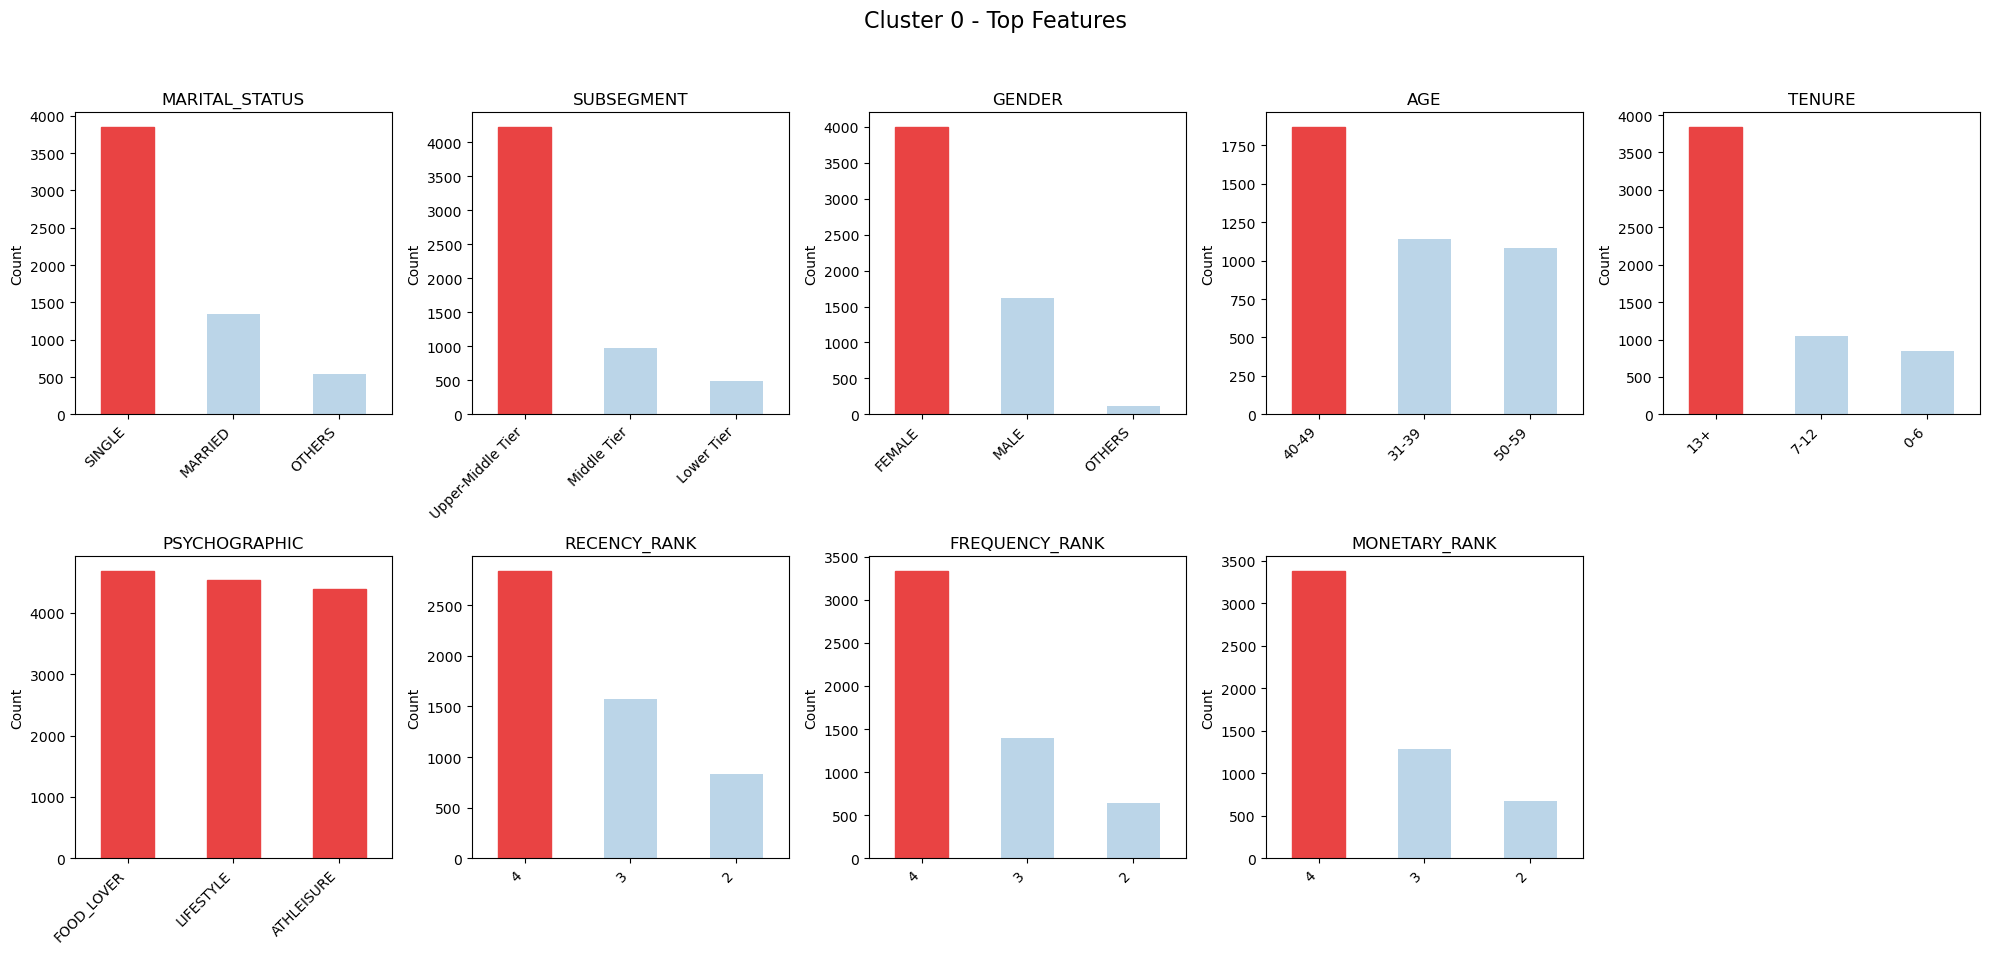

In [ ]:
plot_top_features(clust, 0)

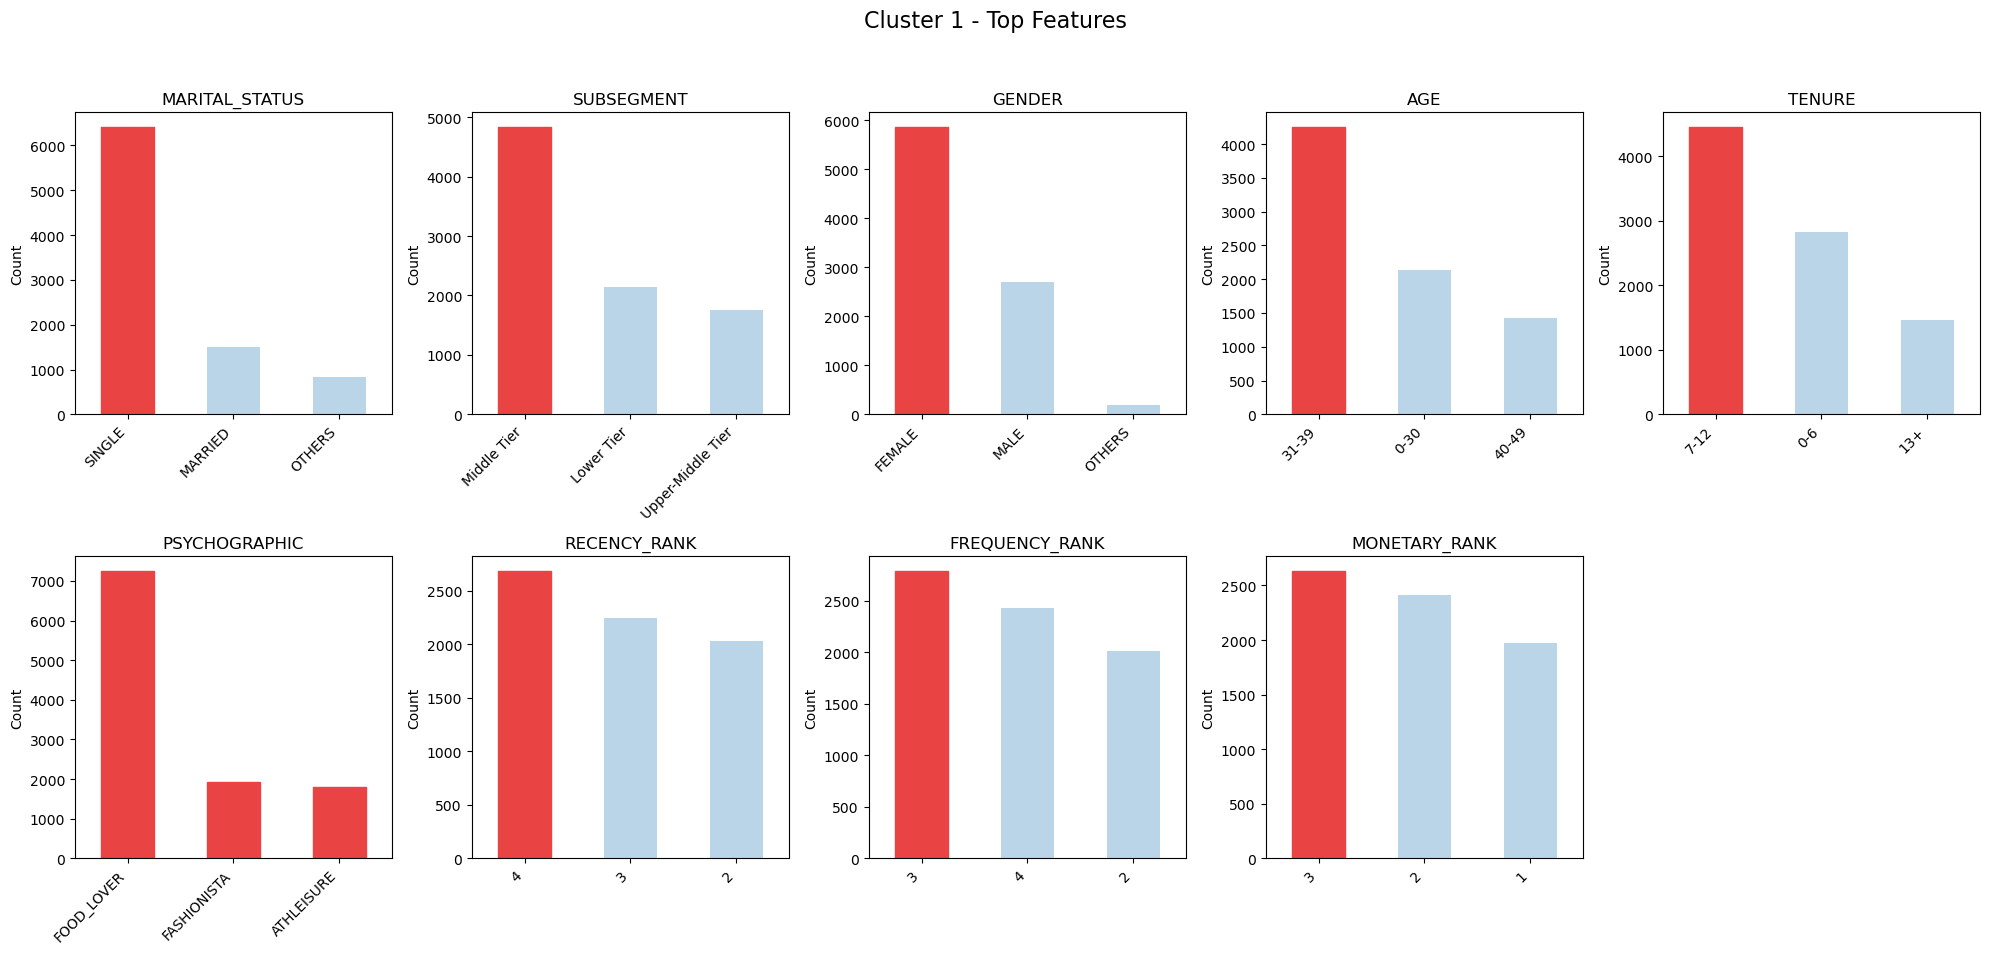

In [ ]:
plot_top_features(clust, 1)

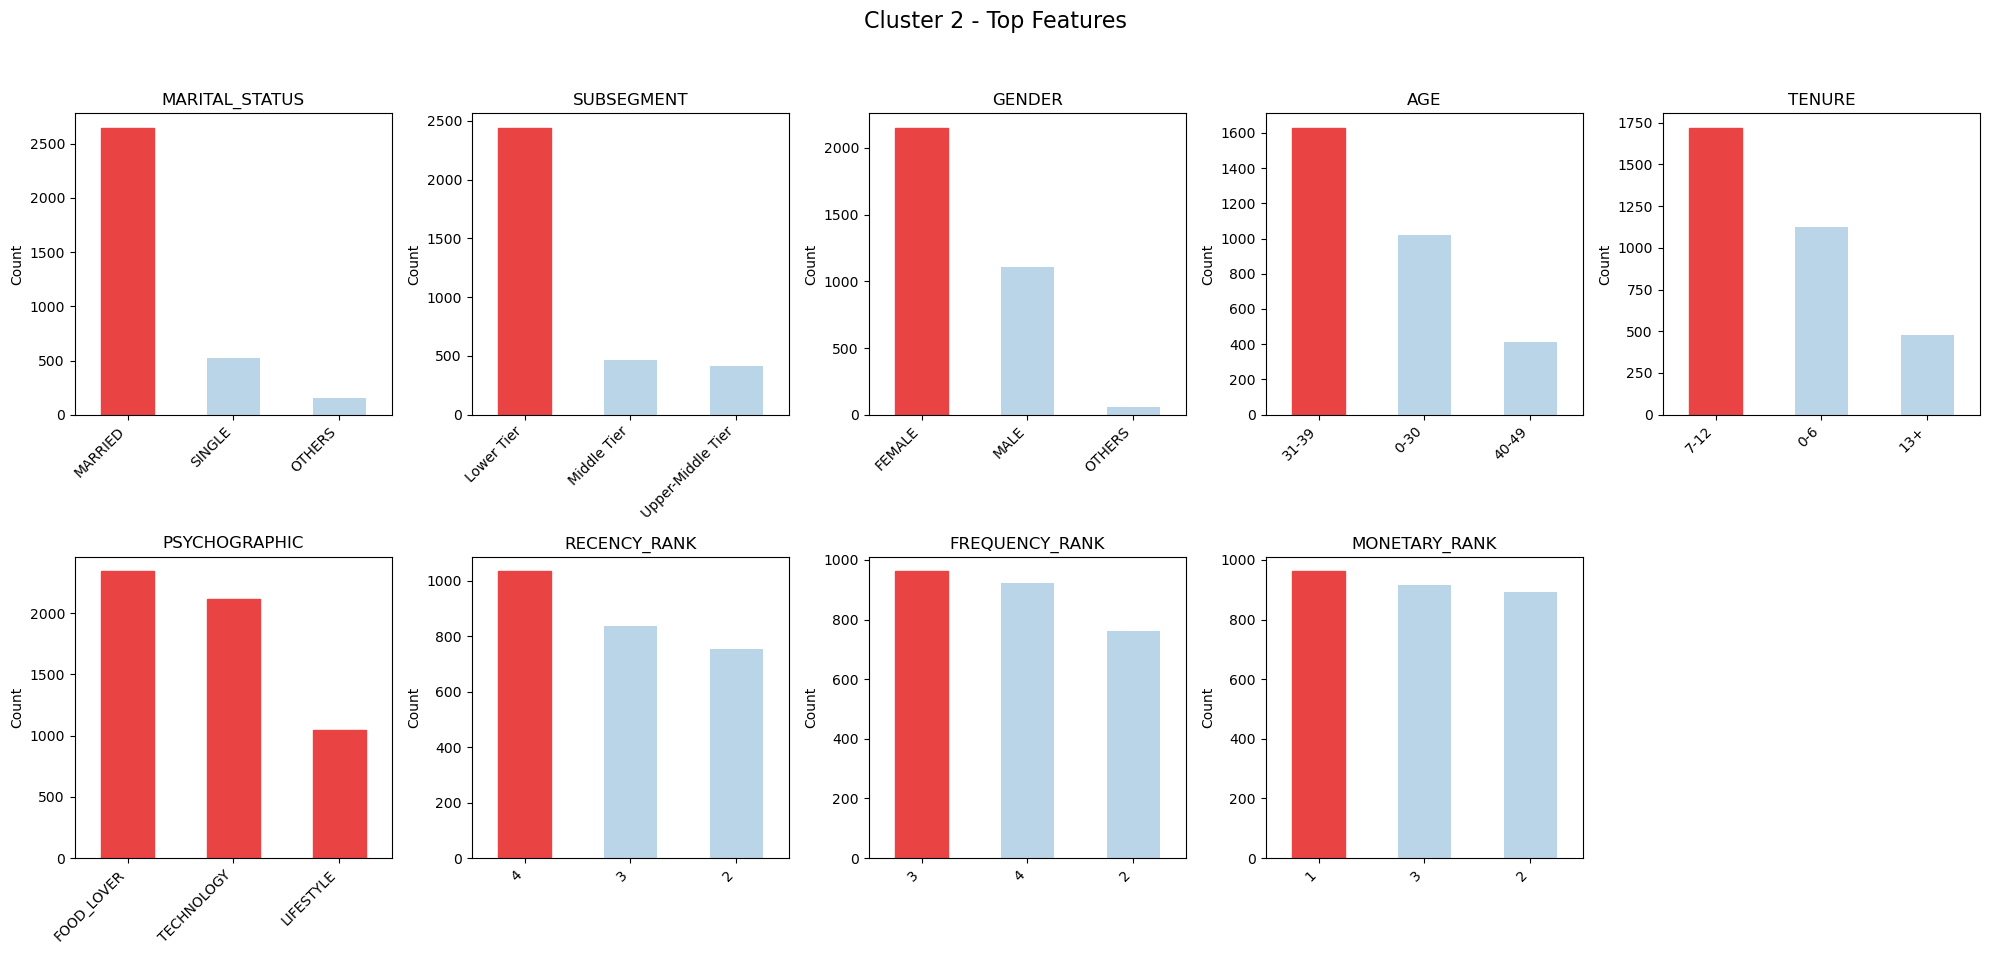

In [ ]:
plot_top_features(clust, 2)

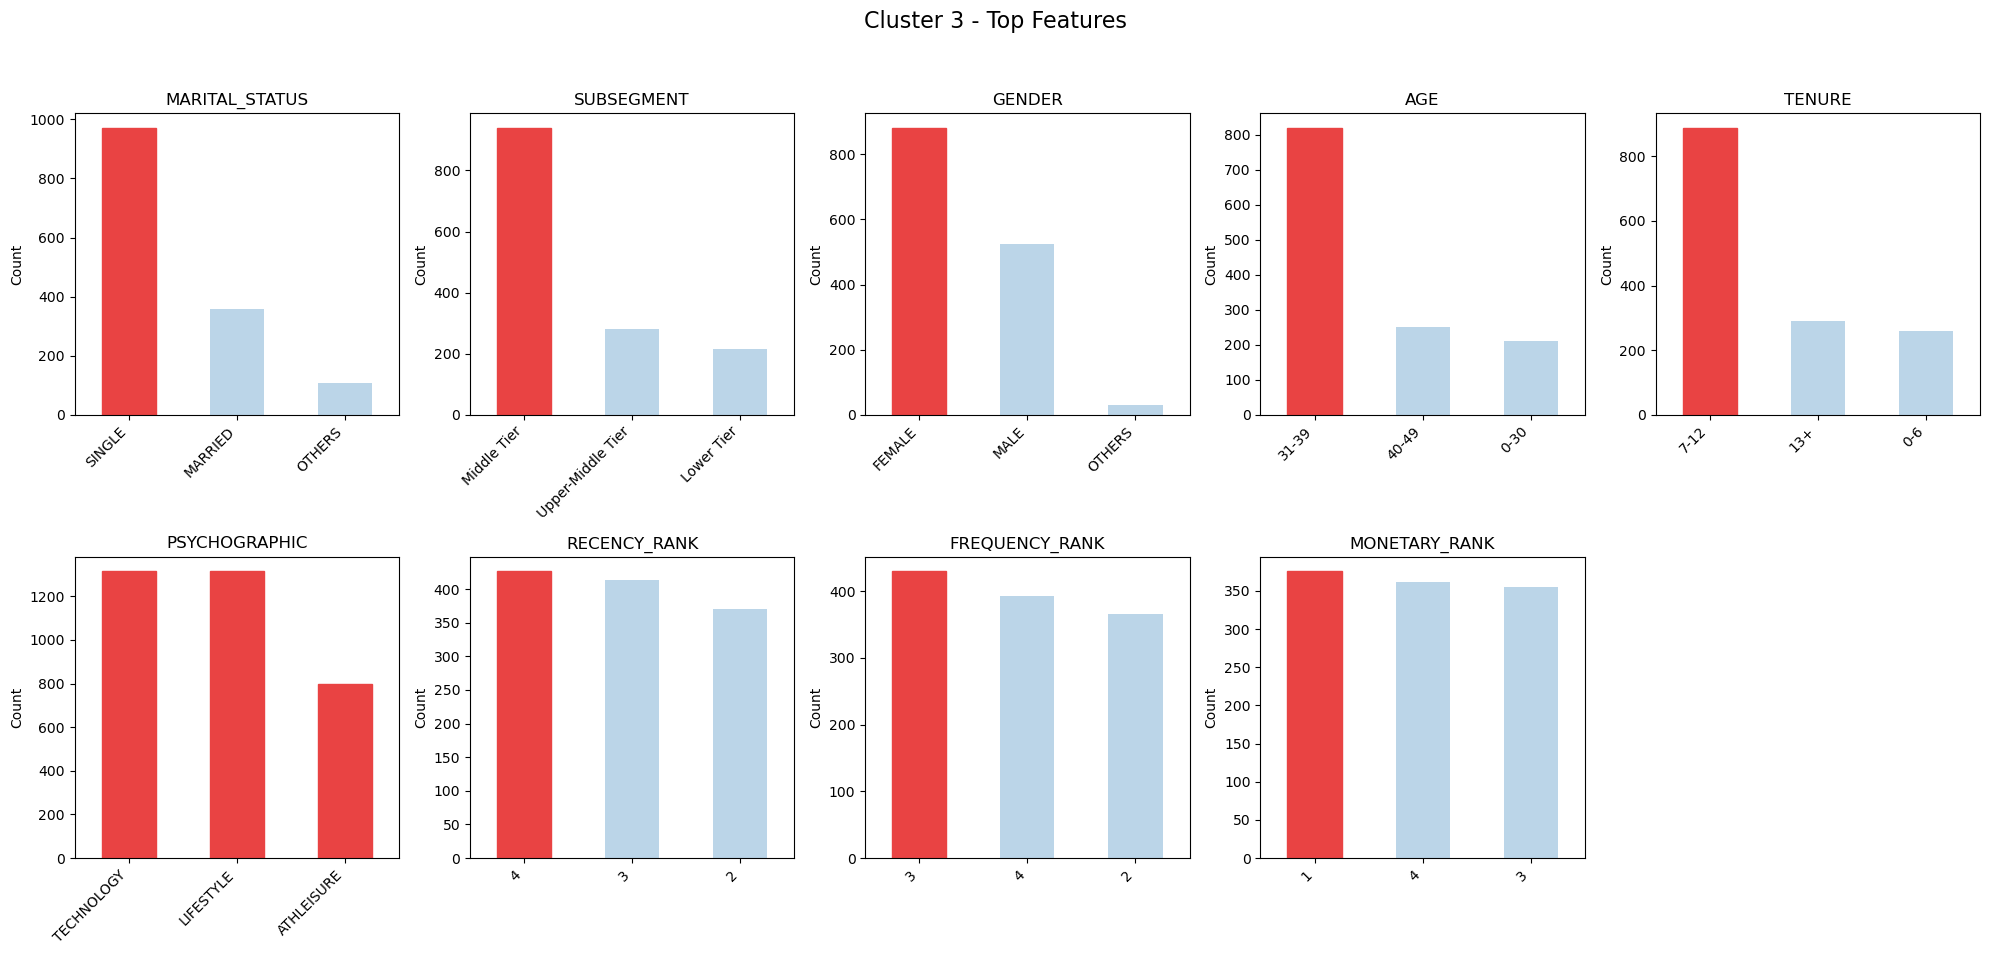

In [ ]:
plot_top_features(clust, 3)

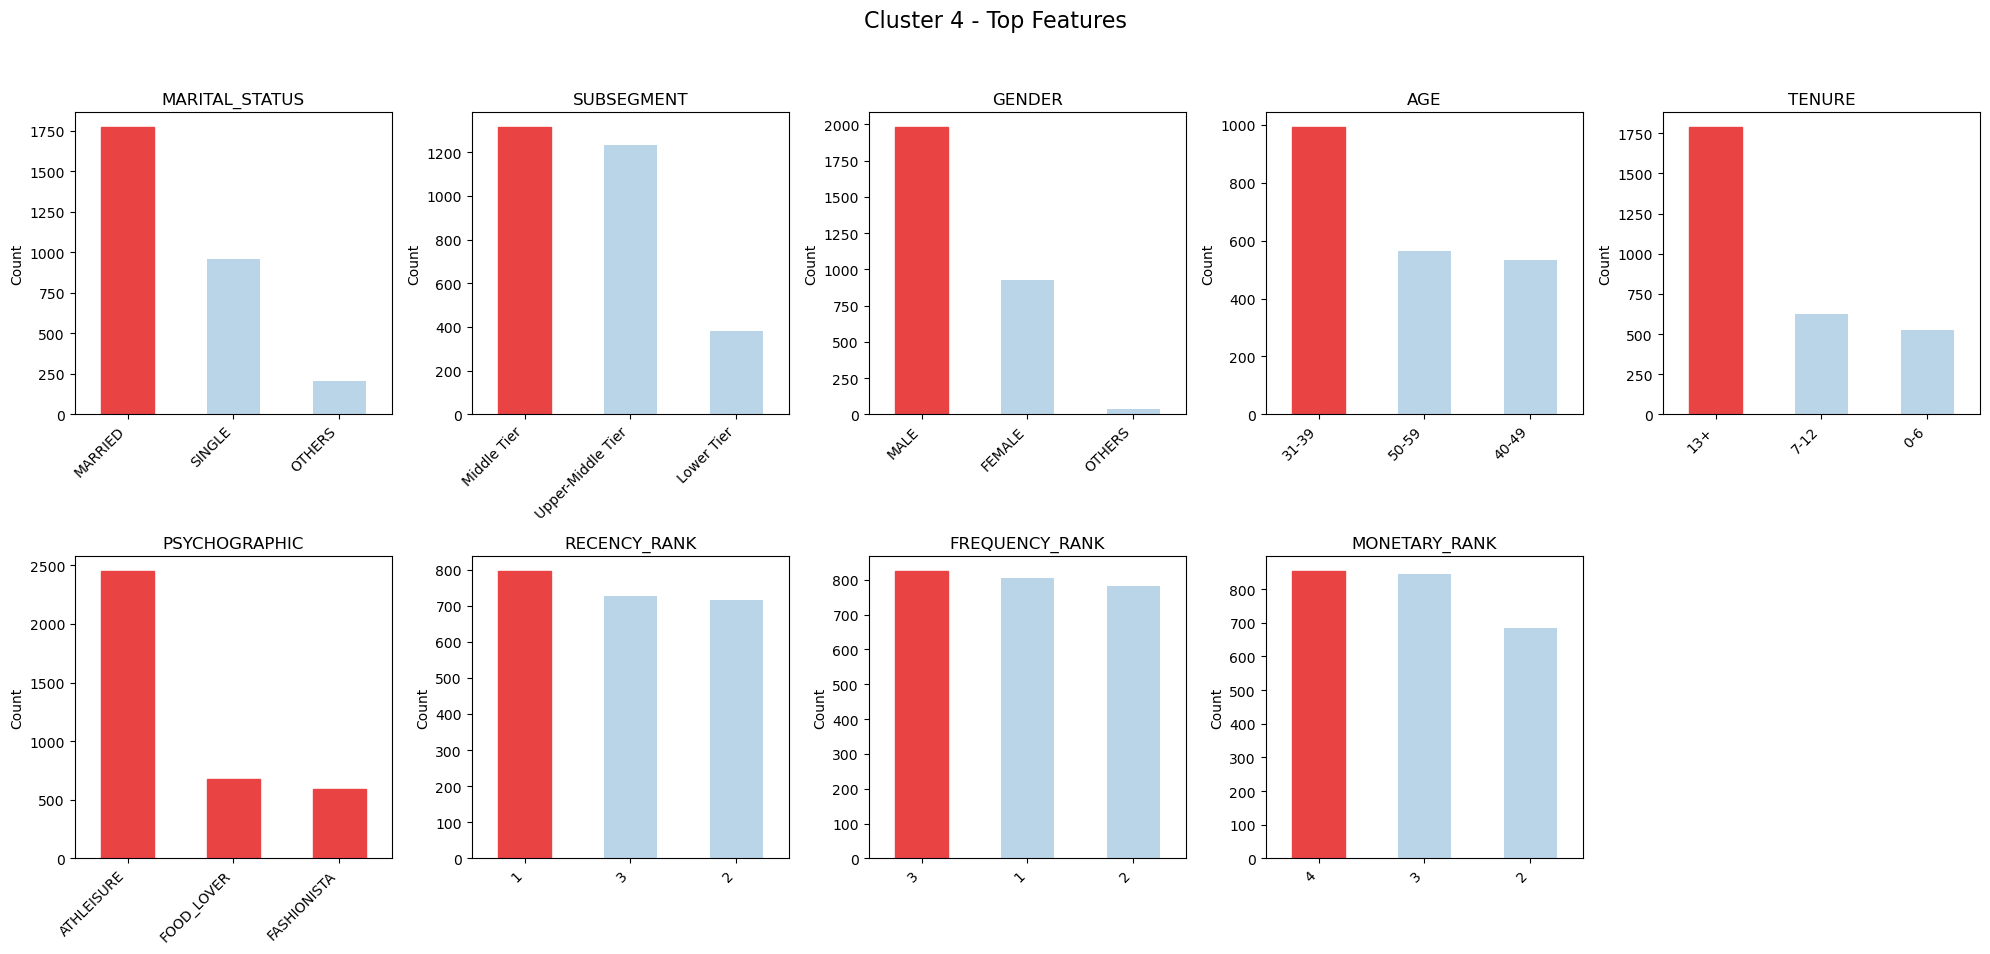

In [ ]:
plot_top_features(clust, 4)

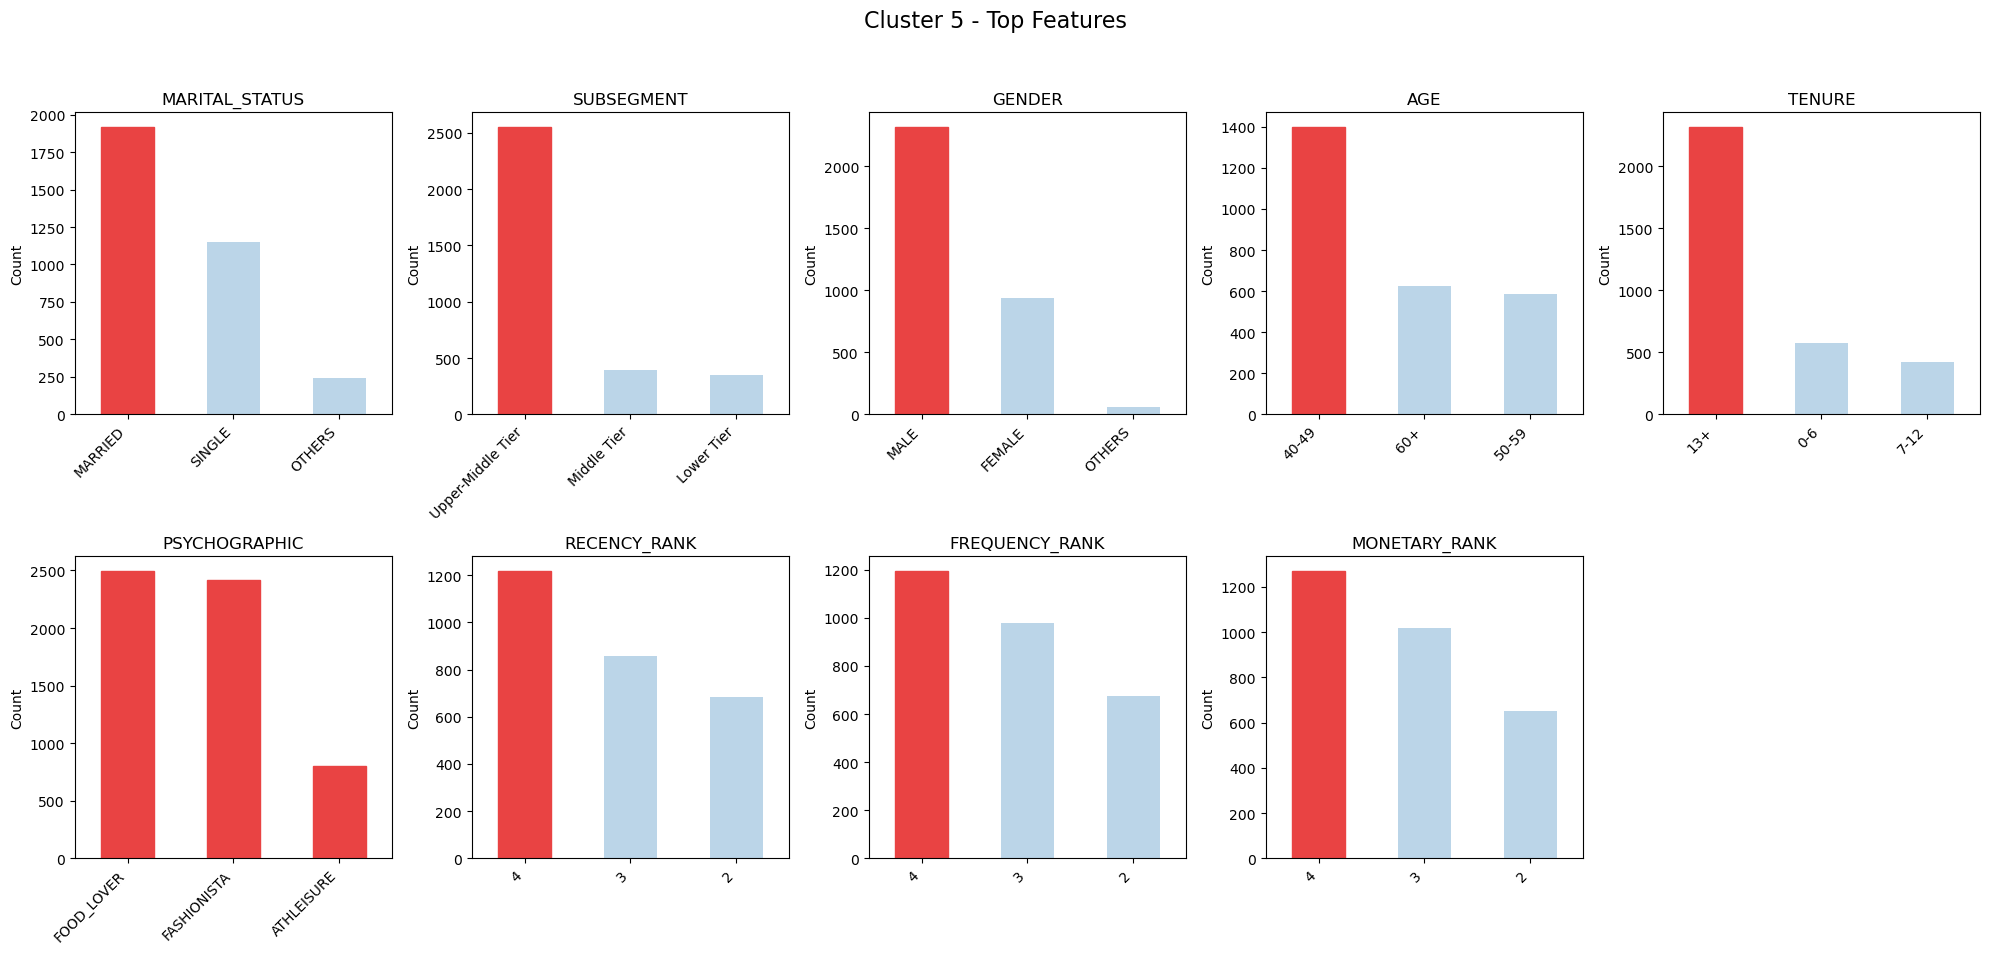

In [ ]:
plot_top_features(clust, 5)

In [ ]:
clust

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK,MARITAL_STATUS,SUBSEGMENT,GENDER,AGE,TENURE,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY,Cluster
0,142.625383,2,3,2,2,3,1,1,1,0,0,1,0,0,4
1,206.014563,4,1,2,1,3,0,4,2,0,0,1,1,0,0
2,220.099977,3,3,1,2,0,0,0,0,0,0,0,1,0,1
3,224.187422,1,1,1,0,3,0,4,2,0,0,1,0,0,4
4,248.282098,2,3,2,2,0,1,2,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,14140.499284,4,4,4,2,3,0,2,2,0,1,1,1,1,0
25486,14140.686829,4,4,3,2,1,0,0,0,1,0,0,0,0,1
25487,14140.849479,2,4,3,0,1,0,2,0,1,1,1,0,0,5
25488,14141.135810,4,4,4,2,1,0,0,1,1,1,1,1,0,0


In [ ]:
clust.SUBSEGMENT.value_counts()

SUBSEGMENT
3    10466
1     8928
0     6023
2       73
Name: count, dtype: int64

In [ ]:
zero = clust[clust['Cluster'] == 0]
one = clust[clust['Cluster'] == 1]
two = clust[clust['Cluster'] == 2]
three = clust[clust['Cluster'] == 3]
four = clust[clust['Cluster'] == 4]
five = clust[clust['Cluster'] == 5]


In [ ]:
zero.MONETARY_RANK.value_counts()

MONETARY_RANK
4    3381
3    1284
2     675
1     392
Name: count, dtype: int64

In [ ]:
one.MONETARY_RANK.value_counts()

MONETARY_RANK
3    2635
2    2409
1    1972
4    1724
Name: count, dtype: int64

In [ ]:
two.MONETARY_RANK.value_counts()

MONETARY_RANK
1    963
3    915
2    891
4    554
Name: count, dtype: int64

In [ ]:
three.MONETARY_RANK.value_counts()

MONETARY_RANK
1    376
4    362
3    355
2    344
Name: count, dtype: int64

In [ ]:
four.MONETARY_RANK.value_counts()

MONETARY_RANK
4    855
3    844
2    684
1    561
Name: count, dtype: int64

In [ ]:
five.MONETARY_RANK.value_counts()

MONETARY_RANK
4    1271
3    1016
2     650
1     377
Name: count, dtype: int64

# Lifetimes

In [ ]:
import lifetimes as lf
from lifetimes.plotting import plot_probability_alive_matrix

In [ ]:
df = cc_txns_df[['CUST_NUM', 'DATE', 'AMOUNT']]

In [ ]:
clust_cust_nums = set(clust['CUST_NUM'])
df = df[df['CUST_NUM'].isin(clust_cust_nums)]

In [ ]:
df

,CUST_NUM,DATE,AMOUNT
0,12458.073687,2024-01-15,-1.000000
1,12802.502177,2024-01-05,330.505264
2,7668.580181,2024-01-15,2002.673795
3,8940.501216,2024-03-16,72.211926
4,8017.532289,2024-02-01,3965.935680
...,...,...,...
1003580,3394.698808,2024-01-21,5607.252843
1003581,13835.543430,2024-01-19,781.636735
1003582,13194.968814,2024-03-05,225.197751
1003583,10334.936962,2024-02-17,1795.994907


In [ ]:
current_date = df['DATE'].max()

# Calculate summary data
summary_df = df.groupby('CUST_NUM').agg(
    frequency=('DATE', 'nunique'),  # Number of unique transaction dates
    recency=('DATE', lambda x: (x.max() - x.min()).days),  # Recency in days
    T=('DATE', lambda x: (current_date - x.min()).days),  # Age in days
    monetary_value=('AMOUNT', 'mean')  # Average transaction value
)

# Convert the rest of the features to float
summary_df = summary_df.astype(float)

In [ ]:
summary_df

,frequency,recency,T,monetary_value
CUST_NUM,,,,
142.625383,14.0,32.0,44.0,862.078790
206.014563,2.0,44.0,45.0,16692.720220
220.099977,13.0,84.0,86.0,716.612215
224.187422,1.0,0.0,90.0,10289.621429
248.282098,16.0,60.0,72.0,793.935402
...,...,...,...,...
14140.499284,31.0,90.0,90.0,4845.500987
14140.686829,26.0,89.0,89.0,1605.644375
14140.849479,29.0,82.0,89.0,851.210777


In [ ]:
# summary_df = lf.utils.summary_data_from_transaction_data(df, customer_id_col= 'CUST_NUM', datetime_col= 'DATE', monetary_value_col='AMOUNT', freq = 'D')
# summary_df[summary_df['monetary_value'] <= 0]
# summary_df = summary_df[summary_df['monetary_value'] > 0]

# summary_df

In [ ]:
# summary_df = summary_df.reset_index()
# # Check if CUST_NUM in clust is in cc_clv
# missing_cust_num = clust[~clust['CUST_NUM'].isin(summary_df['CUST_NUM'])]

# # Display the missing CUST_NUMs
# missing_cust_num

# BG/NBD (Beta Geometric / Negative Binomial Distribution)

This model focuses on customer purchase behavior. It models the probability of a customer being alive (not churned) and the purchase rate for active customers. This information is used to predict future purchase frequency.

In [ ]:
bgf = lf.BetaGeoFitter(penalizer_coef= 0.15)

In [ ]:
bgf.fit(summary_df['frequency'], summary_df['recency'], summary_df['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.970711,0.006550,0.957873,0.983550
alpha,3.624372,0.035462,3.554867,3.693877
a,0.010527,0.000389,0.009765,0.011288
b,0.216327,0.007041,0.202527,0.230126


In [ ]:
summary_df['proba_alive'] = bgf.conditional_probability_alive(summary_df['frequency'], summary_df['recency'], summary_df['T'])
summary_df

,frequency,recency,T,monetary_value,proba_alive
CUST_NUM,,,,,
142.625383,14.0,32.0,44.0,862.078790,0.942083
206.014563,2.0,44.0,45.0,16692.720220,0.990878
220.099977,13.0,84.0,86.0,716.612215,0.998820
224.187422,1.0,0.0,90.0,10289.621429,0.032764
248.282098,16.0,60.0,72.0,793.935402,0.987182
...,...,...,...,...,...
14140.499284,31.0,90.0,90.0,4845.500987,0.999652
14140.686829,26.0,89.0,89.0,1605.644375,0.999583
14140.849479,29.0,82.0,89.0,851.210777,0.996083


<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

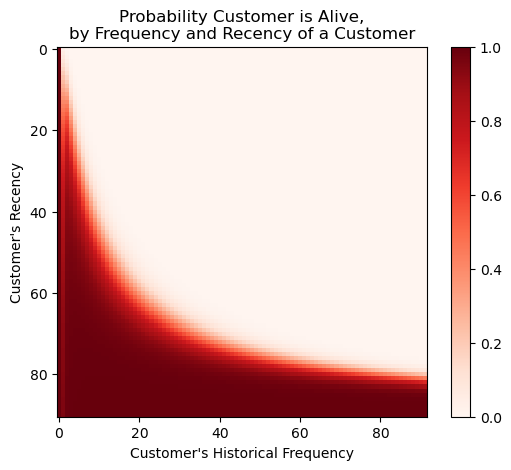

In [ ]:
plot_probability_alive_matrix(bgf, cmap = 'Reds')

In [ ]:
summary_df['predicted_num_purchase'] = bgf.conditional_expected_number_of_purchases_up_to_time(30, summary_df['frequency'], summary_df['recency'], summary_df['T'])
summary_df = summary_df.reset_index(drop=False)
summary_df

,CUST_NUM,frequency,recency,T,monetary_value,proba_alive,predicted_num_purchase
0,142.625383,14.0,32.0,44.0,862.078790,0.942083,8.857107
1,206.014563,2.0,44.0,45.0,16692.720220,0.990878,1.807991
2,220.099977,13.0,84.0,86.0,716.612215,0.998820,4.662588
3,224.187422,1.0,0.0,90.0,10289.621429,0.032764,0.020618
4,248.282098,16.0,60.0,72.0,793.935402,0.987182,6.632443
...,...,...,...,...,...,...,...
25485,14140.499284,31.0,90.0,90.0,4845.500987,0.999652,10.224333
25486,14140.686829,26.0,89.0,89.0,1605.644375,0.999583,8.717570
25487,14140.849479,29.0,82.0,89.0,851.210777,0.996083,9.653419
25488,14141.135810,58.0,90.0,90.0,949.035240,0.999816,18.862797


## Gamma-Gamma Model

This model focuses on the average transaction value (ATV). It assumes that purchase amounts follow a Gamma distribution and estimates parameters to predict the average transaction value for a customer.

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

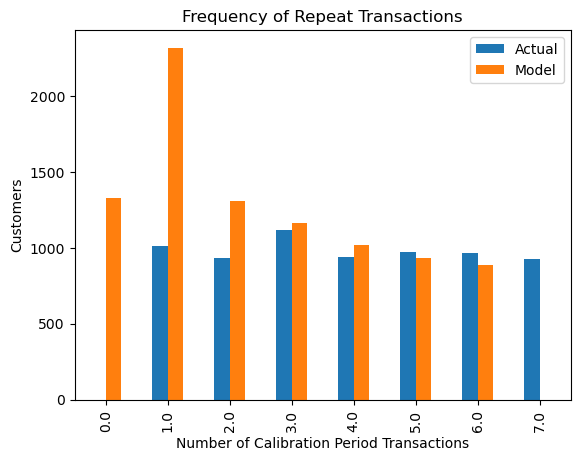

In [ ]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

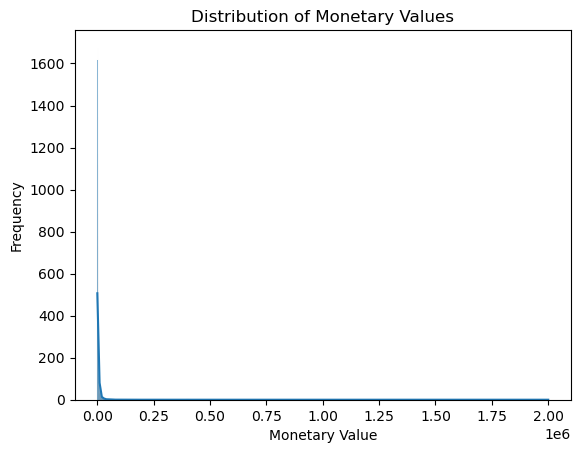

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'summary_df' is your DataFrame and 'monetary_value' is your column of interest
sns.histplot(summary_df['monetary_value'], kde=True)
plt.title('Distribution of Monetary Values')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.show()

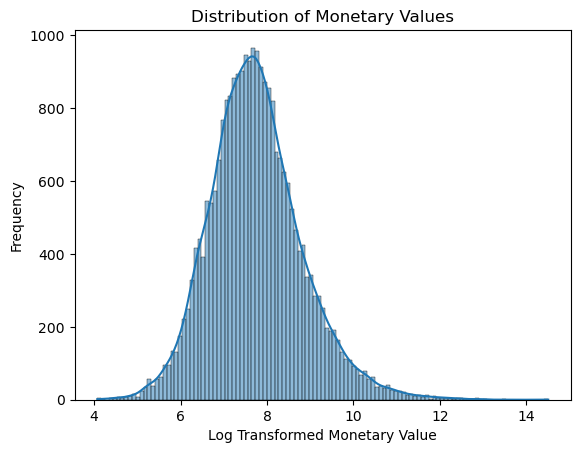

In [ ]:
summary_df['log_monetary_value'] = np.log(summary_df['monetary_value'] + 1)

sns.histplot(summary_df['log_monetary_value'], kde=True)
plt.title('Distribution of Monetary Values')
plt.xlabel('Log Transformed Monetary Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
ggf = lf.GammaGammaFitter(penalizer_coef=0.1)

In [ ]:
ggf.fit(summary_df['frequency'], summary_df['log_monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 25490 subjects, p: 1.35, q: 0.59, v: 1.31>

In [ ]:
summary_df['predicted_avg_sales'] = ggf.conditional_expected_average_profit(summary_df['frequency'], summary_df['log_monetary_value'])

max_log_value = np.log(1e6)
summary_df['predicted_avg_sales'] = np.minimum(summary_df['predicted_avg_sales'], max_log_value)

summary_df['predicted_avg_sales'] = np.exp(summary_df['predicted_avg_sales']) - 1

summary_df

,CUST_NUM,frequency,recency,T,monetary_value,proba_alive,predicted_num_purchase,log_monetary_value,predicted_avg_sales
0,142.625383,14.0,32.0,44.0,862.078790,0.942083,8.857107,6.760506,1103.697099
1,206.014563,2.0,44.0,45.0,16692.720220,0.990878,1.807991,9.722788,209569.921835
2,220.099977,13.0,84.0,86.0,716.612215,0.998820,4.662588,6.575929,931.384877
3,224.187422,1.0,0.0,90.0,10289.621429,0.032764,0.020618,9.238988,999999.000000
4,248.282098,16.0,60.0,72.0,793.935402,0.987182,6.632443,6.678261,983.392175
...,...,...,...,...,...,...,...,...,...
25485,14140.499284,31.0,90.0,90.0,4845.500987,0.999652,10.224333,8.486012,5503.531594
25486,14140.686829,26.0,89.0,89.0,1605.644375,0.999583,8.717570,7.381903,1845.132276
25487,14140.849479,29.0,82.0,89.0,851.210777,0.996083,9.653419,6.747834,957.617859
25488,14141.135810,58.0,90.0,90.0,949.035240,0.999816,18.862797,6.856499,1006.868137


In [ ]:
summary_df['predicted_avg_sales'].describe()

count     25490.000000
mean      34238.237175
std      147815.689078
min         112.370782
25%        1572.324314
50%        3130.663335
75%        7393.585287
max      999999.000000
Name: predicted_avg_sales, dtype: float64

In [ ]:
# # Check for large values in the predicted log-transformed average sales
# print(summary_df['predicted_avg_sales'].describe())

# # Cap the values at a reasonable maximum (e.g., log(1e6))
# max_log_value = np.log(1e6)
# summary_df['predicted_avg_sales'] = np.minimum(summary_df['predicted_avg_sales'], max_log_value)

# # Transform back to the original scale
# summary_df['predicted_avg_sales'] = np.exp(summary_df['predicted_avg_sales']) - 1

# # Check the transformed values
# print(summary_df['predicted_avg_sales'].describe())


In [ ]:
summary_df['predicted_clv_1m'] = ggf.customer_lifetime_value(bgf,
                                                             summary_df['frequency'],
                                                             summary_df['recency'],
                                                             summary_df['T'],
                                                             summary_df['monetary_value'],
                                                             time = 1,
                                                             freq= 'D',
                                                             discount_rate= 0.01)
summary_df

,CUST_NUM,frequency,recency,T,monetary_value,proba_alive,predicted_num_purchase,log_monetary_value,predicted_avg_sales,predicted_clv_1m
0,142.625383,14.0,32.0,44.0,862.078790,0.942083,8.857107,6.760506,1103.697099,7729.636600
1,206.014563,2.0,44.0,45.0,16692.720220,0.990878,1.807991,9.722788,209569.921835,35278.405341
2,220.099977,13.0,84.0,86.0,716.612215,0.998820,4.662588,6.575929,931.384877,3388.381786
3,224.187422,1.0,0.0,90.0,10289.621429,0.032764,0.020618,9.238988,999999.000000,302.664542
4,248.282098,16.0,60.0,72.0,793.935402,0.987182,6.632443,6.678261,983.392175,5315.763029
...,...,...,...,...,...,...,...,...,...,...
25485,14140.499284,31.0,90.0,90.0,4845.500987,0.999652,10.224333,8.486012,5503.531594,49540.779340
25486,14140.686829,26.0,89.0,89.0,1605.644375,0.999583,8.717570,7.381903,1845.132276,14024.162702
25487,14140.849479,29.0,82.0,89.0,851.210777,0.996083,9.653419,6.747834,957.617859,8222.905481
25488,14141.135810,58.0,90.0,90.0,949.035240,0.999816,18.862797,6.856499,1006.868137,17818.615530


## Merging CLV and Cluster Dataframes

In [ ]:
cc_clv = summary_df.drop(['frequency', 'recency', 'recency', 'T', 'monetary_value'], axis = 1)

In [ ]:
cc_clv

,CUST_NUM,proba_alive,predicted_num_purchase,log_monetary_value,predicted_avg_sales,predicted_clv_1m
0,142.625383,0.942083,8.857107,6.760506,1103.697099,7729.636600
1,206.014563,0.990878,1.807991,9.722788,209569.921835,35278.405341
2,220.099977,0.998820,4.662588,6.575929,931.384877,3388.381786
3,224.187422,0.032764,0.020618,9.238988,999999.000000,302.664542
4,248.282098,0.987182,6.632443,6.678261,983.392175,5315.763029
...,...,...,...,...,...,...
25485,14140.499284,0.999652,10.224333,8.486012,5503.531594,49540.779340
25486,14140.686829,0.999583,8.717570,7.381903,1845.132276,14024.162702
25487,14140.849479,0.996083,9.653419,6.747834,957.617859,8222.905481
25488,14141.135810,0.999816,18.862797,6.856499,1006.868137,17818.615530


In [ ]:
# # Check if CUST_NUM in clust is in cc_clv
# missing_cust_num = clust[~clust['CUST_NUM'].isin(cc_clv['CUST_NUM'])]

# missing_cust_num

In [ ]:
# missing_cust_num.Cluster.value_counts()

In [ ]:
# missing_cust_num = missing_cust_num[['CUST_NUM']]

In [ ]:
# final_cc_clv = pd.concat([cc_clv, missing_cust_num], ignore_index=True)
# final_cc_clv = final_cc_clv.fillna(0)

In [ ]:
# final_cc_clv

In [ ]:
merged_df = pd.merge(clust, cc_clv, on='CUST_NUM', how='inner')

In [ ]:
merged_df

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK,MARITAL_STATUS,SUBSEGMENT,GENDER,AGE,TENURE,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY,Cluster,proba_alive,predicted_num_purchase,log_monetary_value,predicted_avg_sales,predicted_clv_1m
0,142.625383,2,3,2,2,3,1,1,1,0,0,1,0,0,4,0.942083,8.857107,6.760506,1103.697099,7729.636600
1,206.014563,4,1,2,1,3,0,4,2,0,0,1,1,0,0,0.990878,1.807991,9.722788,209569.921835,35278.405341
2,220.099977,3,3,1,2,0,0,0,0,0,0,0,1,0,1,0.998820,4.662588,6.575929,931.384877,3388.381786
3,224.187422,1,1,1,0,3,0,4,2,0,0,1,0,0,4,0.032764,0.020618,9.238988,999999.000000,302.664542
4,248.282098,2,3,2,2,0,1,2,0,1,0,0,0,0,1,0.987182,6.632443,6.678261,983.392175,5315.763029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,14140.499284,4,4,4,2,3,0,2,2,0,1,1,1,1,0,0.999652,10.224333,8.486012,5503.531594,49540.779340
25486,14140.686829,4,4,3,2,1,0,0,0,1,0,0,0,0,1,0.999583,8.717570,7.381903,1845.132276,14024.162702
25487,14140.849479,2,4,3,0,1,0,2,0,1,1,1,0,0,5,0.996083,9.653419,6.747834,957.617859,8222.905481
25488,14141.135810,4,4,4,2,1,0,0,1,1,1,1,1,0,0,0.999816,18.862797,6.856499,1006.868137,17818.615530


In [ ]:
last_four_columns = merged_df.iloc[:, -4:]

rows_with_zero = (last_four_columns == 0).any(axis=1).sum()

rows_with_zero

0

In [ ]:
merged_df

,CUST_NUM,RECENCY_RANK,FREQUENCY_RANK,MONETARY_RANK,MARITAL_STATUS,SUBSEGMENT,GENDER,AGE,TENURE,FOOD_LOVER,FASHIONISTA,ATHLEISURE,LIFESTYLE,TECHNOLOGY,Cluster,proba_alive,predicted_num_purchase,log_monetary_value,predicted_avg_sales,predicted_clv_1m
0,142.625383,2,3,2,2,3,1,1,1,0,0,1,0,0,4,0.942083,8.857107,6.760506,1103.697099,7729.636600
1,206.014563,4,1,2,1,3,0,4,2,0,0,1,1,0,0,0.990878,1.807991,9.722788,209569.921835,35278.405341
2,220.099977,3,3,1,2,0,0,0,0,0,0,0,1,0,1,0.998820,4.662588,6.575929,931.384877,3388.381786
3,224.187422,1,1,1,0,3,0,4,2,0,0,1,0,0,4,0.032764,0.020618,9.238988,999999.000000,302.664542
4,248.282098,2,3,2,2,0,1,2,0,1,0,0,0,0,1,0.987182,6.632443,6.678261,983.392175,5315.763029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25485,14140.499284,4,4,4,2,3,0,2,2,0,1,1,1,1,0,0.999652,10.224333,8.486012,5503.531594,49540.779340
25486,14140.686829,4,4,3,2,1,0,0,0,1,0,0,0,0,1,0.999583,8.717570,7.381903,1845.132276,14024.162702
25487,14140.849479,2,4,3,0,1,0,2,0,1,1,1,0,0,5,0.996083,9.653419,6.747834,957.617859,8222.905481
25488,14141.135810,4,4,4,2,1,0,0,1,1,1,1,1,0,0,0.999816,18.862797,6.856499,1006.868137,17818.615530


## Results Part 2

In [ ]:
averages = merged_df.groupby('Cluster').agg({
    'proba_alive': 'mean',
    'predicted_num_purchase': 'mean',
    'predicted_avg_sales': 'mean',
    'predicted_clv_1m': 'mean'
}).reset_index()

print("\nAverages for specified columns by Cluster:")
display(averages)


Averages for specified columns by Cluster:


,Cluster,proba_alive,predicted_num_purchase,predicted_avg_sales,predicted_clv_1m
0,0,0.963738,10.227962,16732.553374,39909.046676
1,1,0.911967,6.126922,31897.535724,17020.848274
2,2,0.912500,6.170334,36113.687033,14885.368220
3,3,0.953390,6.351454,21354.375365,18348.856345
4,4,0.883075,4.969494,76787.751225,26257.788094
5,5,0.923505,6.893857,36596.876406,28364.827844


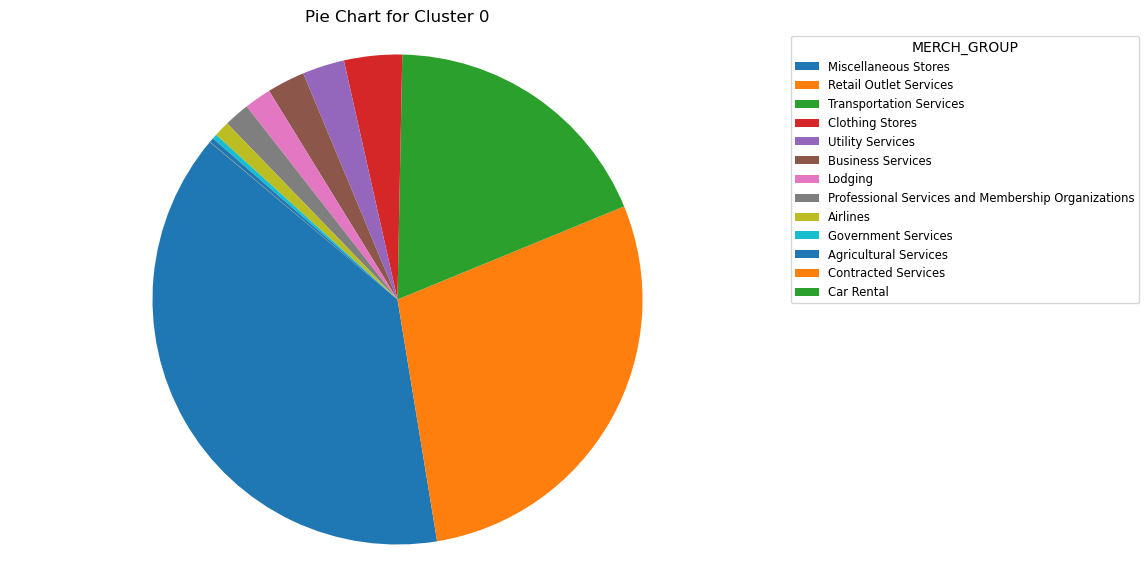


Tabular values for Cluster 0:
MERCH_GROUP
Miscellaneous Stores                                  118357
Retail Outlet Services                                 87533
Transportation Services                                56540
Clothing Stores                                        11699
Utility Services                                        8487
Business Services                                       7626
Lodging                                                 5415
Professional Services and Membership Organizations      5140
Airlines                                                3168
Government Services                                      949
Agricultural Services                                    899
Contracted Services                                       37
Car Rental                                                10
Name: count, dtype: int64


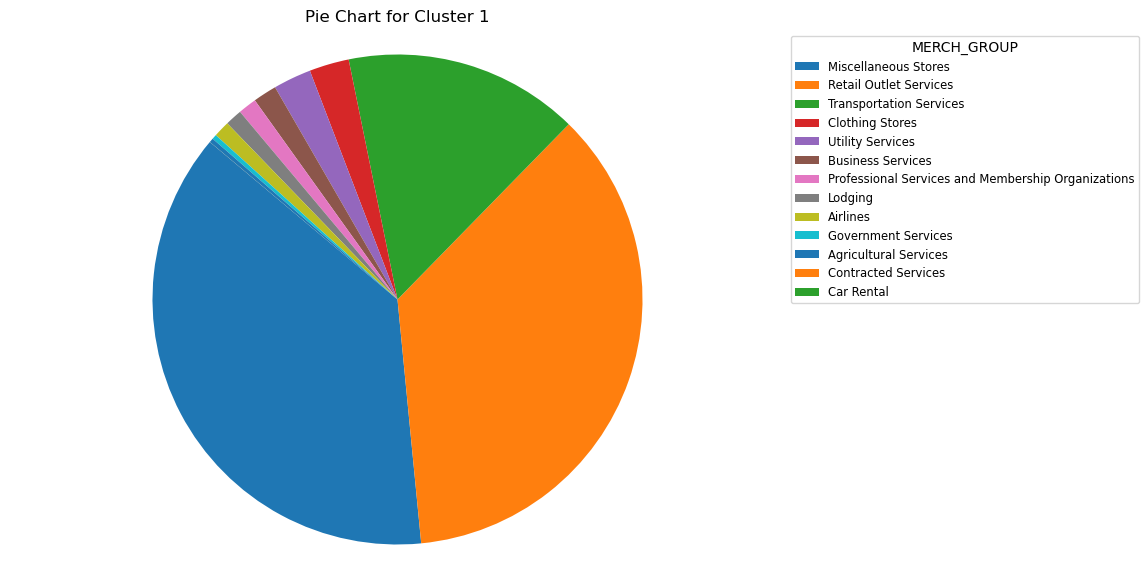


Tabular values for Cluster 1:
MERCH_GROUP
Miscellaneous Stores                                  82614
Retail Outlet Services                                79287
Transportation Services                               34042
Clothing Stores                                        5757
Utility Services                                       5505
Business Services                                      3430
Professional Services and Membership Organizations     2677
Lodging                                                2449
Airlines                                               2342
Government Services                                     679
Agricultural Services                                   608
Contracted Services                                       7
Car Rental                                                3
Name: count, dtype: int64


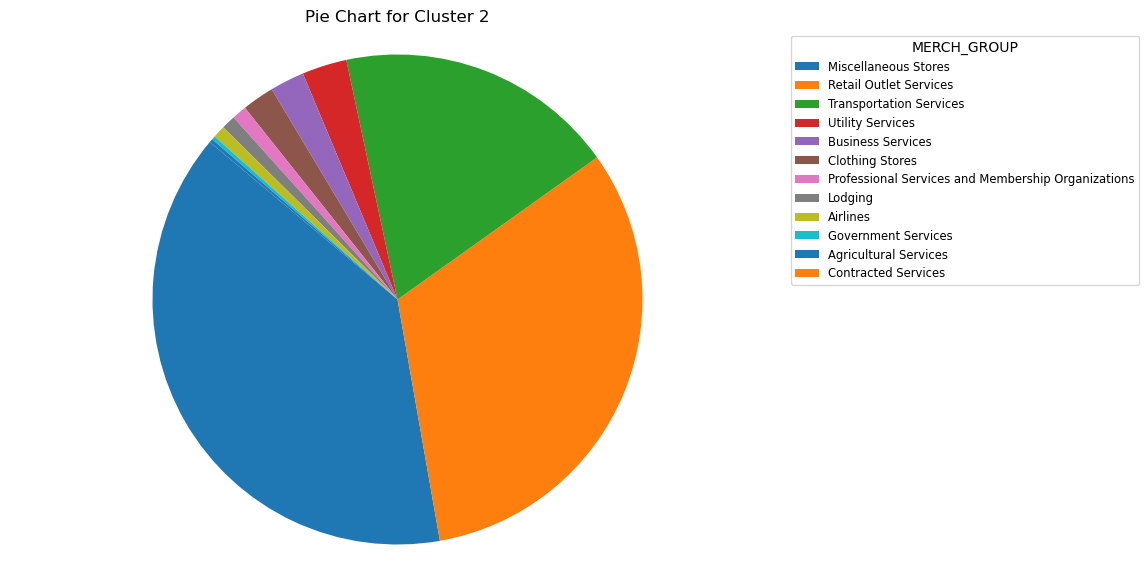


Tabular values for Cluster 2:
MERCH_GROUP
Miscellaneous Stores                                  32344
Retail Outlet Services                                26686
Transportation Services                               15392
Utility Services                                       2462
Business Services                                      1890
Clothing Stores                                        1759
Professional Services and Membership Organizations      809
Lodging                                                 768
Airlines                                                682
Government Services                                     201
Agricultural Services                                   193
Contracted Services                                       1
Name: count, dtype: int64


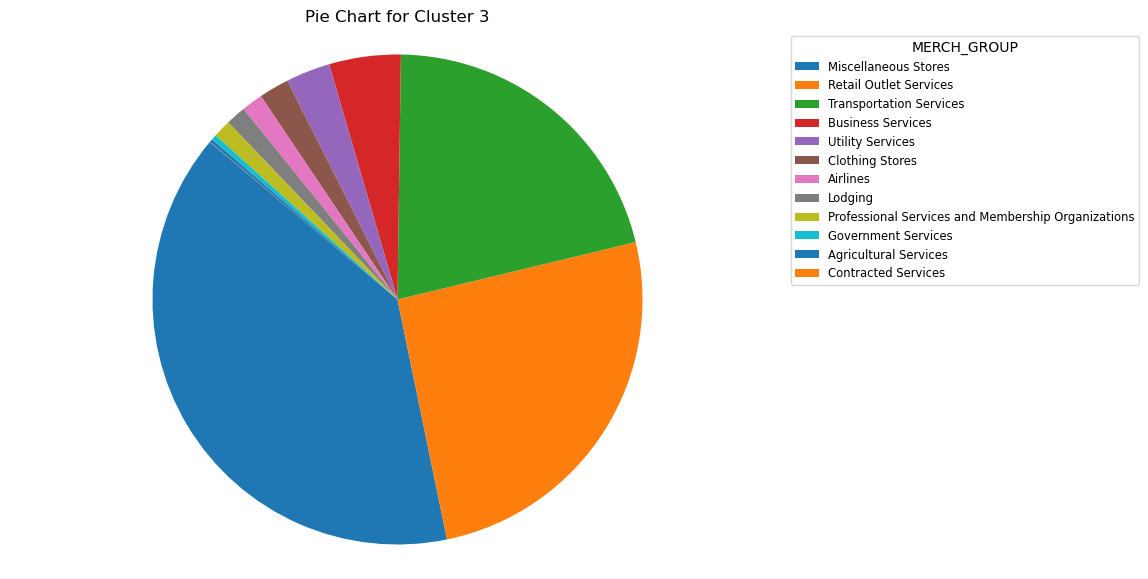


Tabular values for Cluster 3:
MERCH_GROUP
Miscellaneous Stores                                  14665
Retail Outlet Services                                 9513
Transportation Services                                7832
Business Services                                      1760
Utility Services                                       1089
Clothing Stores                                         743
Airlines                                                522
Lodging                                                 491
Professional Services and Membership Organizations      439
Government Services                                     132
Agricultural Services                                    76
Contracted Services                                       6
Name: count, dtype: int64


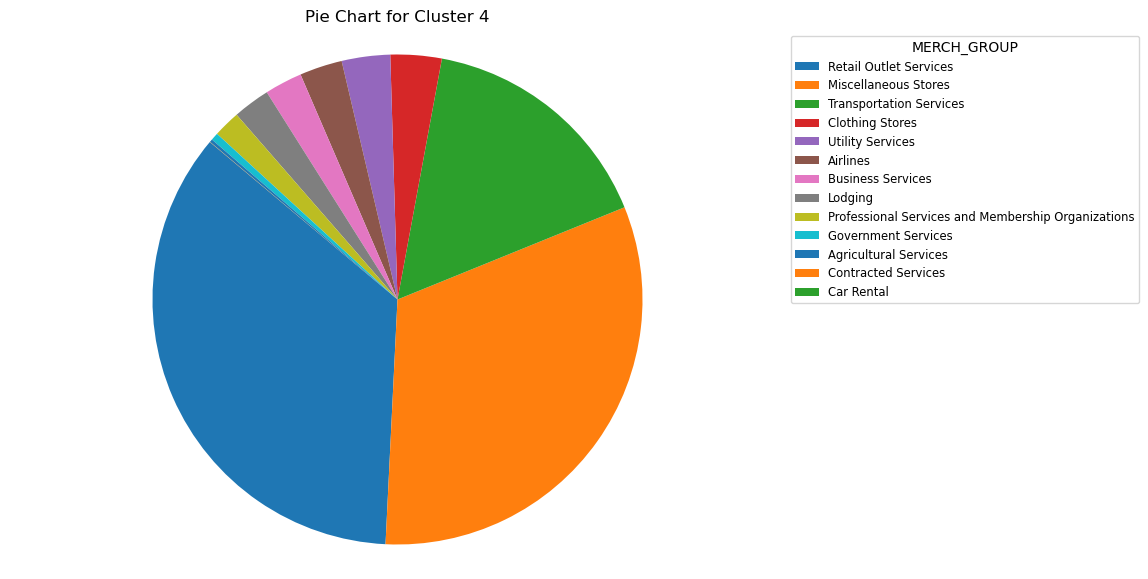


Tabular values for Cluster 4:
MERCH_GROUP
Retail Outlet Services                                19816
Miscellaneous Stores                                  17902
Transportation Services                                8948
Clothing Stores                                        1892
Utility Services                                       1791
Airlines                                               1578
Business Services                                      1392
Lodging                                                1371
Professional Services and Membership Organizations      998
Government Services                                     278
Agricultural Services                                   109
Contracted Services                                       8
Car Rental                                                1
Name: count, dtype: int64


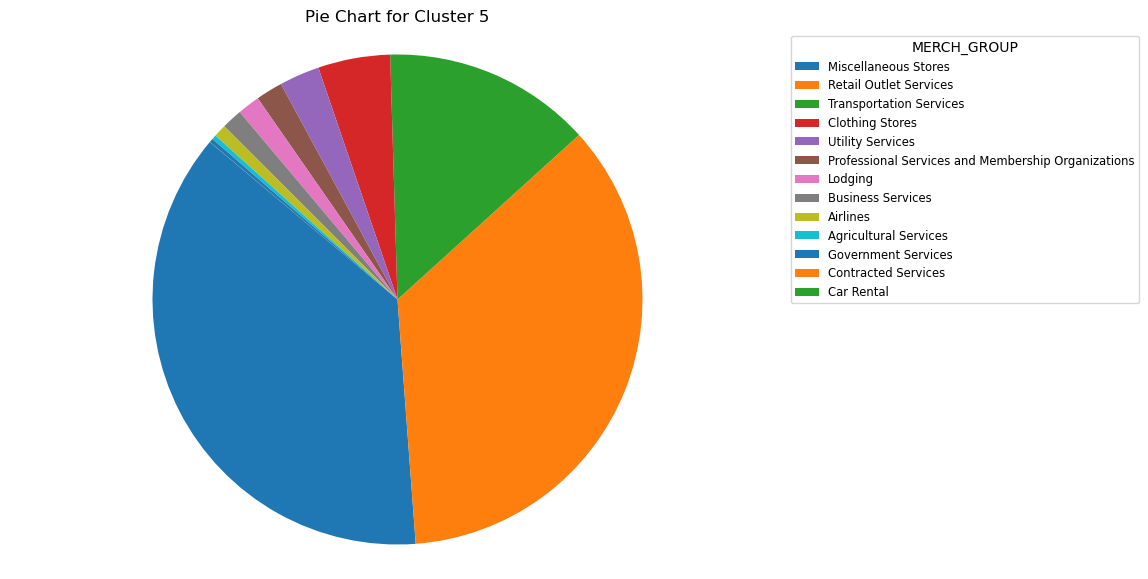


Tabular values for Cluster 5:
MERCH_GROUP
Miscellaneous Stores                                  38187
Retail Outlet Services                                36381
Transportation Services                               14090
Clothing Stores                                        4872
Utility Services                                       2722
Professional Services and Membership Organizations     1810
Lodging                                                1508
Business Services                                      1399
Airlines                                                856
Agricultural Services                                   300
Government Services                                     257
Contracted Services                                       6
Car Rental                                                1
Name: count, dtype: int64


In [ ]:
clusters = sorted(merged_df['Cluster'].unique())

# Loop through each cluster starting with Cluster 0
for cluster in clusters:
    # Get CUST_NUMs for the current cluster
    cust_nums = merged_df[merged_df['Cluster'] == cluster]['CUST_NUM']

    # Filter cc_txns_df for the current CUST_NUMs
    cluster_txns_df = cc_txns_df[cc_txns_df['CUST_NUM'].isin(cust_nums)]

    # Check if there are any records for the current cluster
    if not cluster_txns_df.empty:
        # Create a pie chart for the MERCH_GROUP column
        plt.figure(figsize=(10, 7))
        merch_group_counts = cluster_txns_df['MERCH_GROUP'].value_counts()

        # Plot pie chart
        plt.pie(merch_group_counts, labels=None, startangle=140, colors=plt.get_cmap('tab10').colors)
        plt.title(f'Pie Chart for Cluster {cluster}')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        # Add legend with smaller font size and position it in the top left
        plt.legend(merch_group_counts.index, title='MERCH_GROUP', loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
        plt.show()

        # Print tabular values for the current cluster
        print(f"\nTabular values for Cluster {cluster}:")
        print(merch_group_counts)
    else:
        print(f"\nNo transaction data available for Cluster {cluster}.")